# Prediction of Solar Energy Potential Based on Weather and Location Data

Paper Reference Source :

Pasion C, Wagner T, Koschnick C, Schuldt S, Williams J, Hallinan K. Machine Learning Modeling of Horizontal Photovoltaics Using Weather and Location Data. Energies. 2020; 13(10):2570. https://doi.org/10.3390/en13102570

Dataset Source :

https://www.kaggle.com/datasets/saurabhshahane/northern-hemisphere-horizontal-photovoltaic

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df = pd.read_csv('Pasion et al dataset.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_csv('/content/drive/MyDrive/Personal Projects/Prediction of Solar Energy Potential Based on Weather and Location Data/Pasion et al dataset.csv')

# Initial Data Understanding and Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

## Feature Description (From Paper)

- **Cloud Ceiling:**
  - Definition: The presence of clouds above a panel scatters solar irradiance, decreasing the amount of irradiation received.
  - Measurement: Cloud ceiling is measured at the altitude where at least 5/8ths of the sky above the weather station is covered by clouds [17–25].

- **Latitude:**
  - Definition: Latitude of each location dictates the sun deflection angle, impacting the amount of sunlight received by the panel.
  - References: [12, 21–23, 25, 26].

- **Month:**
  - Definition: The time of year at a location determines the sun's rise, set, and its height in the sky.
  - References: [13, 21].

- **Hour:**
  - Definition: The time of day determines the sun's position, influencing the amount of sunlight received.
  - References: [21].

- **Humidity:**
  - Definition: Water affects incoming sunlight through refraction, diffraction, and reflection. Humidity indirectly affects dust build-up on panels.
  - Additional Info: Dew formation on the panel surface may enhance performance under humid conditions.
  - References: [27, 28].

- **Temperature:**
  - Definition: Solar panel efficiency generally decreases with increasing panel temperature.
  - Additional Info: Temperature as an explanatory variable enhances power output predictability.
  - References: [29, 30, 12, 13, 31–33].

- **Wind Speed:**
  - Definition: Wind speed may affect panel temperature and clean dust off the panel surface or stir up dust, influencing irradiance reaching the panel.
  - References: [34, 35, 36].

- **Visibility:**
  - Definition: Measurement of the distance at which light can be seen and identified.
  - Impact: Affects irradiation reaching the panel; low visibility during daylight hours may negatively impact power output.
  - References: [37].

- **Pressure:**
  - Definition: Pressure may indicate weather occurrences, such as storms, potentially affecting power output predictability.
  - Note: This variable has not been extensively explored in solar panel power output literature.
  - References: [38].

- **Altitude:**
  - Definition: Locations at higher altitudes have less atmosphere for the sun to travel through, resulting in higher irradiation.
  - Impact: Higher altitudes above sea level receive higher levels of irradiation.


## Target Description (From Paper)

**PolyPwr** means the amount of power output (Watts) recorded from Raspberry Pi computer system in polycrystalline PV panels at 15-min time intervals

In [6]:
#Checking the data samples
df.sample(20)

Location      Date  Time  Latitude  Longitude  Altitude  \
14650    Peterson  20180320  1400     38.82    -104.71      1879   
15429    Peterson  20180807  1200     38.82    -104.71      1879   
15074    Peterson  20180604  1515     38.82    -104.71      1879   
14251    Peterson  20180104  1300     38.82    -104.71      1879   
2092      Grissom  20180716  1000     40.67     -86.15       239   
7408      Kahului  20180420  1400     20.89    -156.44         2   
1522      Grissom  20180427  1200     40.67     -86.15       239   
1197      Grissom  20171124  1100     40.67     -86.15       239   
7065      Kahului  20180121  1200     20.89    -156.44         2   
7581      Kahului  20180522  1500     20.89    -156.44         2   
10583   March AFB  20180322  1500     33.90    -117.26       458   
14565    Peterson  20180305  1300     38.82    -104.71      1879   
2744   Hill Weber  20170714  1300     41.15    -111.99      1370   
14580    Peterson  20180307  1500     38.82    -104.71      1879   
20396       USAFA  20180624  1000     38.95    -104.83      1947   
16947      Travis  20180109  1400     38.16    -121.56         1   
9667    March AFB  20170919  1130     33.90    -117.26       458   
16735      Travis  20171130  1400     38.16    -121.56         1   
13689    Peterson  20170928  1200     38.82    -104.71      1879   
1776      Grissom  20180530  1030     40.67     -86.15       239   

         YRMODAHRMI  Month  Hour  Season  Humidity  AmbientTemp   PolyPwr  \
14650  2.018030e+11      3    14  Spring   8.74634     21.38908  11.06221   
15429  2.018080e+11      8    12  Summer  19.59229     43.22510  18.17998   
15074  2.018060e+11      6    15  Summer   7.01294     36.73950  22.07052   
14251  2.018010e+11      1    13  Winter   0.92163     30.90347   9.02217   
2092   2.018070e+11      7    10  Summer  77.19727     28.99506   3.59233   
7408   2.018040e+11      4    14  Spring  61.65161     29.63455  11.18219   
1522   2.018040e+11      4    12  Spring  34.33838     23.81111  18.18366   
1197   2.017110e+11     11    11    Fall  56.25610      8.43552   4.01142   
7065   2.018010e+11      1    12  Winter  59.32617     29.70253  18.89821   
7581   2.018050e+11      5    15  Spring  59.47876     29.10080  20.29785   
10583  2.018030e+11      3    15  Spring  99.71313     15.53291   4.12374   
14565  2.018030e+11      3    13  Spring   2.21558     15.56061  15.93565   
2744   2.017070e+11      7    13  Summer  12.04834     50.88898  19.18559   
14580  2.018030e+11      3    15  Spring   5.65796     18.13622  15.11576   
20396  2.018060e+11      6    10  Summer  36.14502     25.19081   7.33620   
16947  2.018010e+11      1    14  Winter  87.68921     17.38594   0.84451   
9667   2.017090e+11      9    11    Fall  35.05859     32.22527  20.08927   
16735  2.017110e+11     11    14    Fall  36.09009     21.33118  10.72001   
13689  2.017090e+11      9    12    Fall  99.98779      9.66415   2.74513   
1776   2.018050e+11      5    10  Spring  56.30493     30.33447   2.30356   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  
14650          15        10.0     808.0            200  
15429          11        10.0     815.9            722  
15074          16        10.0     810.8            130  
14251           9        10.0     814.5            722  
2092            5        10.0     985.5             50  
7408           22        10.0    1014.1            722  
1522           16        10.0     978.9            722  
1197           15        10.0     981.2            722  
7065           21        10.0    1014.1            722  
7581           23        10.0    1015.1            722  
10583           8        10.0     961.8            722  
14565          28        10.0     809.4            722  
2744            8        10.0     858.4            722  
14580          11        10.0     812.5            722  
20396           6        10.0     799.2             43  
16947           7        10.0    1001.8           

Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :
- Date feature have the wrong format should be in datetime instead of integer
- Time feature values are wrong because it's written in the format of hour:minute but because of it's data time is integer, it became hourminute (ex : 10:00 -> 1000)
- Latitude and Longitude are useful if we want to make it into geographical plot in Tableau or similar tools, but in here it's already represented by Location, though i read that we could also do geospatial analysis and mapping in python using libraries like Arcpy, Geopandas, Geoplot, etc combined with specific tools/software but i haven't learn details of it right now probably later in the future
- YRMODAHRMI (year, month, day, hour, minute) is actually similar to Date, but it has more detailed date information, probably will check what the values are like since it has so many digits
- There are also separate feature for Month and Hour, we could use this and even though we could extract similar information in YRMODAHRMI feature
- As for categorical feature like Location and Season potentially could be encoded by one-hot enxoding
- Several features scientifically could have high correlation to each other for example Altitude with Pressure and Humidity, but we will check details of this later in bivariate analysis
- PolyPwr is the target variable, we could move it to the last order in dataframe (personal preference)

**! Update on the values of YRMODAHRMI feature** :

- It does not actually represent year, month, day, hour, minute completely. This in investigated using the pd.set_option('display.float_format', '{:.15f}'.format) to set the values in pandas so that we can see all the digits (we could also see it with just the code down below) but here is the example value of the YRMODAHRMI feature 201712000000.000000000000000.

- It can be seen that it only gives you the information of year and month only, so this feature will not be used later.

In [11]:
#Checking on YRMODAHRMI feature values
df['YRMODAHRMI'][0]

201712000000.0

Which means as for the date and time information, the only ones that we could extract other than the avaible ones are year and day only (month and hour already have their own).

**!Important** : We also understand that the PolyPwr is recorded in 15 min interval, but since we can't utilize the time until the scope of minute, we see that in PolyPwr column, the values can be different at the same hour. This is one of the main shortcomings of this dataset that makes it unsuitable for in-depth analysis, especially in time series. I probably will try to find another well-documented public dataset for the next project related to solar cell power generation.

In [12]:
# # Initial data transformation :  converting column name to lowercase
# df.columns = df.columns.str.lower()

In [14]:
#Extract year and day value
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [15]:
# Re-arrange the columns (PolyPwr in last)
df_1 = df.drop(columns='PolyPwr')
df_2 = df['PolyPwr']
df = pd.concat([df_1, df_2], axis='columns')

In [16]:
#Initial drop for obvious unnecessary features
df = df.drop(columns=['Time', 'YRMODAHRMI', 'Latitude', 'Longitude'])

In [17]:
#Checking dataframe after initial transformation
df

Location       Date  Altitude  Month  Hour  Season  Humidity  \
0      Camp Murray 2017-12-03        84     12    11  Winter  81.71997   
1      Camp Murray 2017-12-03        84     12    13  Winter  96.64917   
2      Camp Murray 2017-12-03        84     12    13  Winter  93.61572   
3      Camp Murray 2017-12-04        84     12    12  Winter  77.21558   
4      Camp Murray 2017-12-04        84     12    14  Winter  54.80347   
...            ...        ...       ...    ...   ...     ...       ...   
21040        USAFA 2018-09-28      1947      9    15    Fall  11.66992   
21041        USAFA 2018-09-29      1947      9    13    Fall  18.22510   
21042        USAFA 2018-09-29      1947      9    14    Fall  15.52124   
21043        USAFA 2018-09-29      1947      9    15    Fall   6.63452   
21044        USAFA 2018-10-01      1947     10    14    Fall  22.58301   

       AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Year  \
0         12.86919           5        10.0    1010.6            722  2017   
1          9.66415           0        10.0    1011.3             23  2017   
2         15.44983           5        10.0    1011.6             32  2017   
3         10.36659           5         2.0    1024.4              6  2017   
4         16.85471           3         3.0    1023.7              9  2017   
...            ...         ...         ...       ...            ...   ...   
21040     43.22510          14        10.0     802.3            722  2018   
21041     28.98247          13        10.0     799.2            722  2018   
21042     33.49167          10        10.0     798.4            722  2018   
21043     51.62163          10        10.0     797.8            722  2018   
21044     32.83958          15        10.0     801.2            110  2018   

       Day   PolyPwr  
0        3   2.42769  
1        3   2.46273  
2        3   4.46836  
3        4   1.65364  
4        4   6.57939  
...    ...       ...  
21040   28   9.79611  
21041   29  10.88992  
21042   29   8.24479  
21043   29  12.47328  
21044    1   6.39732  

[21045 rows x 15 columns]

In [12]:
#Checking missing values
df.isna().sum()

Location         0
Date             0
Altitude         0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
Year             0
Day              0
PolyPwr          0
dtype: int64

In [18]:
#Checking amount of duplicated values
df.duplicated().sum()

0

There are no missing or duplicated values in this dataset

# Descriptive Statistics

In [19]:
df.columns

Index(['Location', 'Date', 'Altitude', 'Month', 'Hour', 'Season', 'Humidity',
       'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling',
       'Year', 'Day', 'PolyPwr'],
      dtype='object')

In [20]:
#Grouping columns based on their types

nums = ['Altitude', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']
cats = ['Location', 'Season']
dates = ['Date', 'Year', 'Month', 'Day']

In [21]:
#Describe numerical columns
df[nums].describe().transpose()

count        mean         std        min        25%  \
Altitude       21045.0  798.843668  770.681794    1.00000    2.00000   
Hour           21045.0   12.627845    1.672952   10.00000   11.00000   
Humidity       21045.0   37.121941   23.823011    0.00000   17.52930   
AmbientTemp    21045.0   29.285117   12.366820  -19.98177   21.91528   
Wind.Speed     21045.0   10.318318    6.385030    0.00000    6.00000   
Visibility     21045.0    9.700071    1.351949    0.00000   10.00000   
Pressure       21045.0  925.944747   85.215659  781.70000  845.50000   
Cloud.Ceiling  21045.0  515.966785  301.903379    0.00000  140.00000   
PolyPwr        21045.0   12.978583    7.123255    0.25733    6.40457   

                     50%         75%         max  
Altitude       458.00000  1370.00000  1947.00000  
Hour            13.00000    14.00000    15.00000  
Humidity        33.12378    52.59399    99.98779  
AmbientTemp     30.28915    37.47467    65.73837  
Wind.Speed       9.00000    14.00000    49.00000  
Visibility      10.00000    10.00000    10.00000  
Pressure       961.10000  1008.90000  1029.50000  
Cloud.Ceiling  722.00000   722.00000   722.00000  
PolyPwr         13.79870    18.86365    34.28502

In [23]:
#Describe categorical columns
df[cats].describe().transpose()

count unique     top  freq
Location  21045     12  Travis  2746
Season    21045      4  Summer  8208

In [24]:
#Categorical Feature Counts
for col in cats :
  print(f'Value counts untuk {col} :')
  print(df[col].value_counts(), '\n')

Value counts untuk Location :
Location
Travis         2746
Peterson       2640
USAFA          2573
Hill Weber     2384
March AFB      2204
JDMT           1779
Malmstrom      1517
Grissom        1487
Camp Murray    1113
Kahului         941
Offutt          881
MNANG           780
Name: count, dtype: int64 

Value counts untuk Season :
Season
Summer    8208
Spring    4808
Fall      4407
Winter    3622
Name: count, dtype: int64 



# Univariate Analysis

## Numerical Columns

In [25]:
#Check number of subplots that will be make
len(df[nums].columns)

9

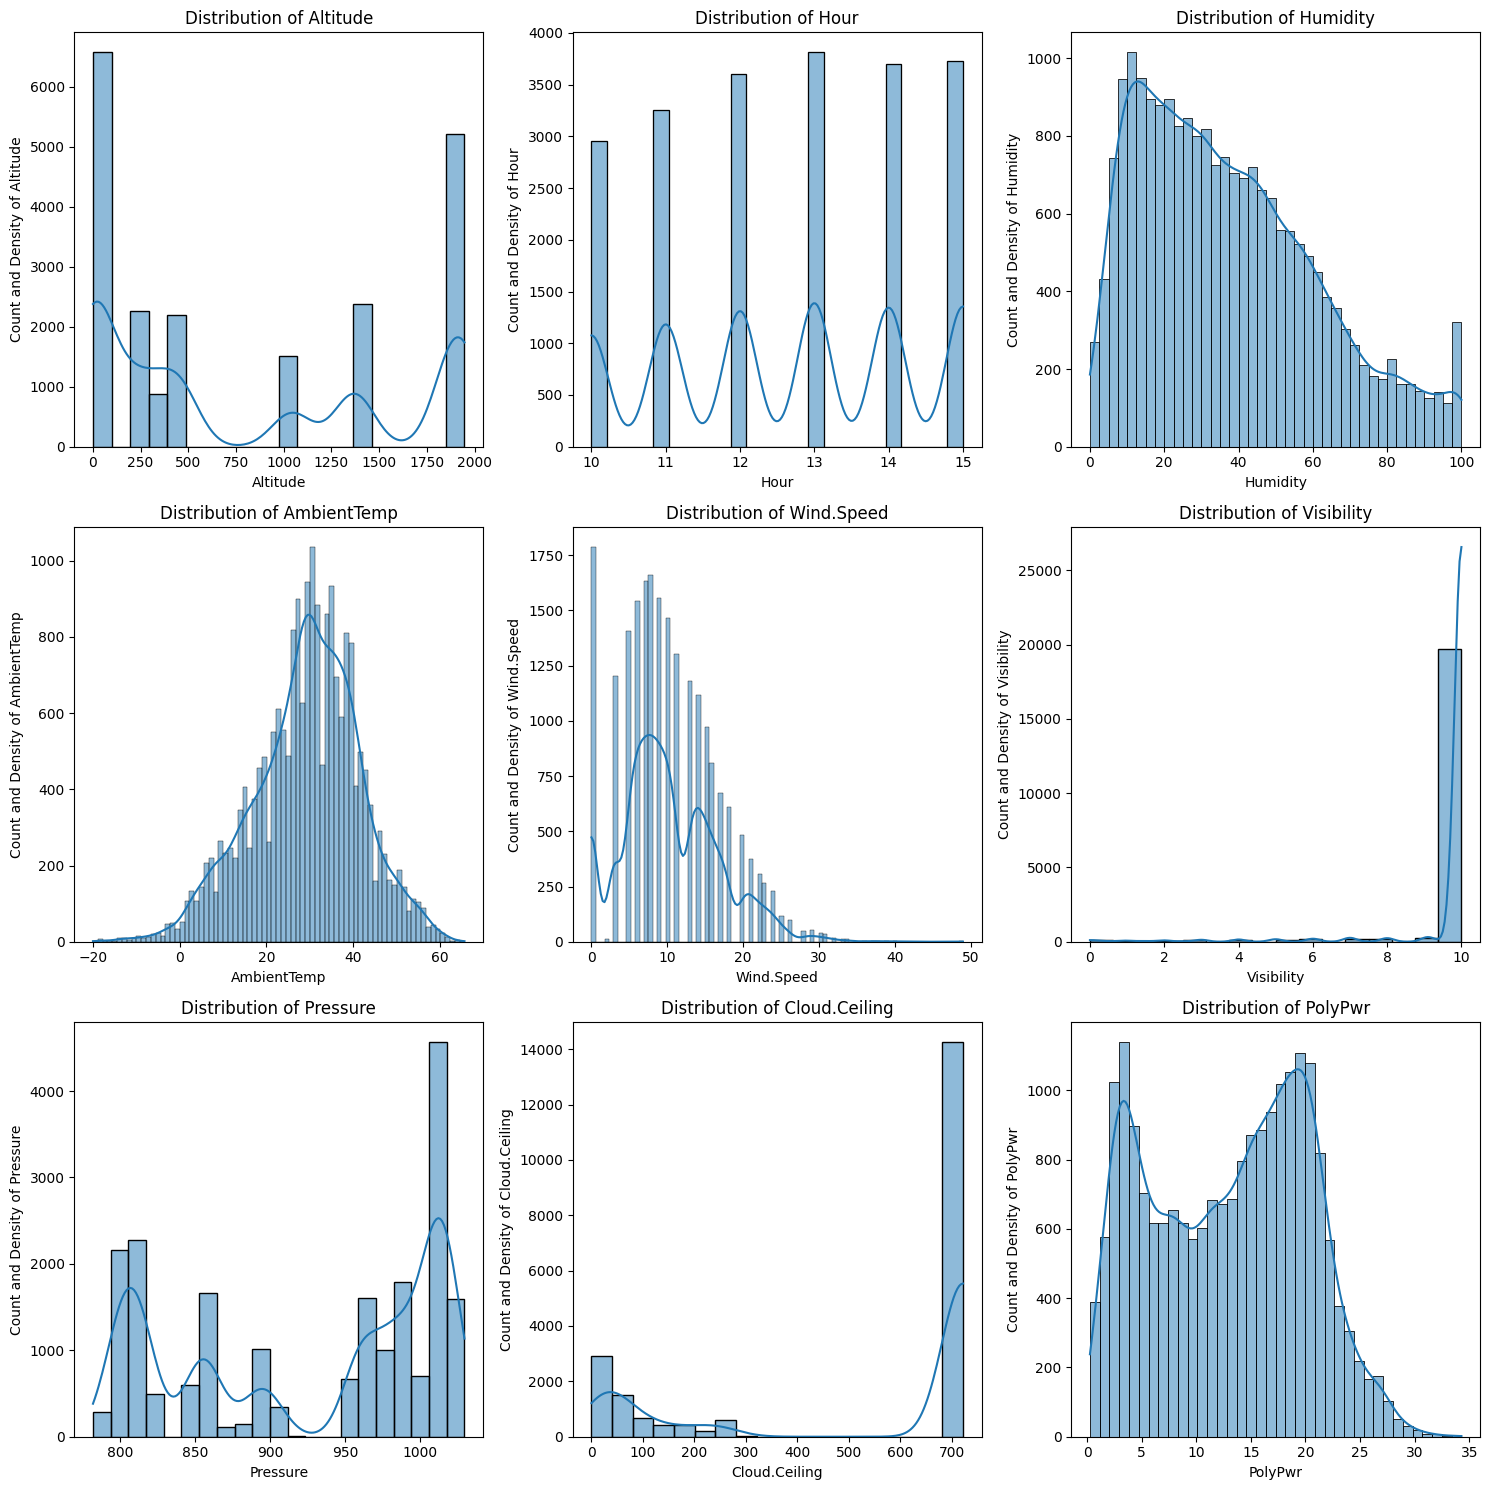

In [34]:
# Histplot with kde

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.histplot(data=df, ax=axes[i], x=nums[i], kde=True)
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

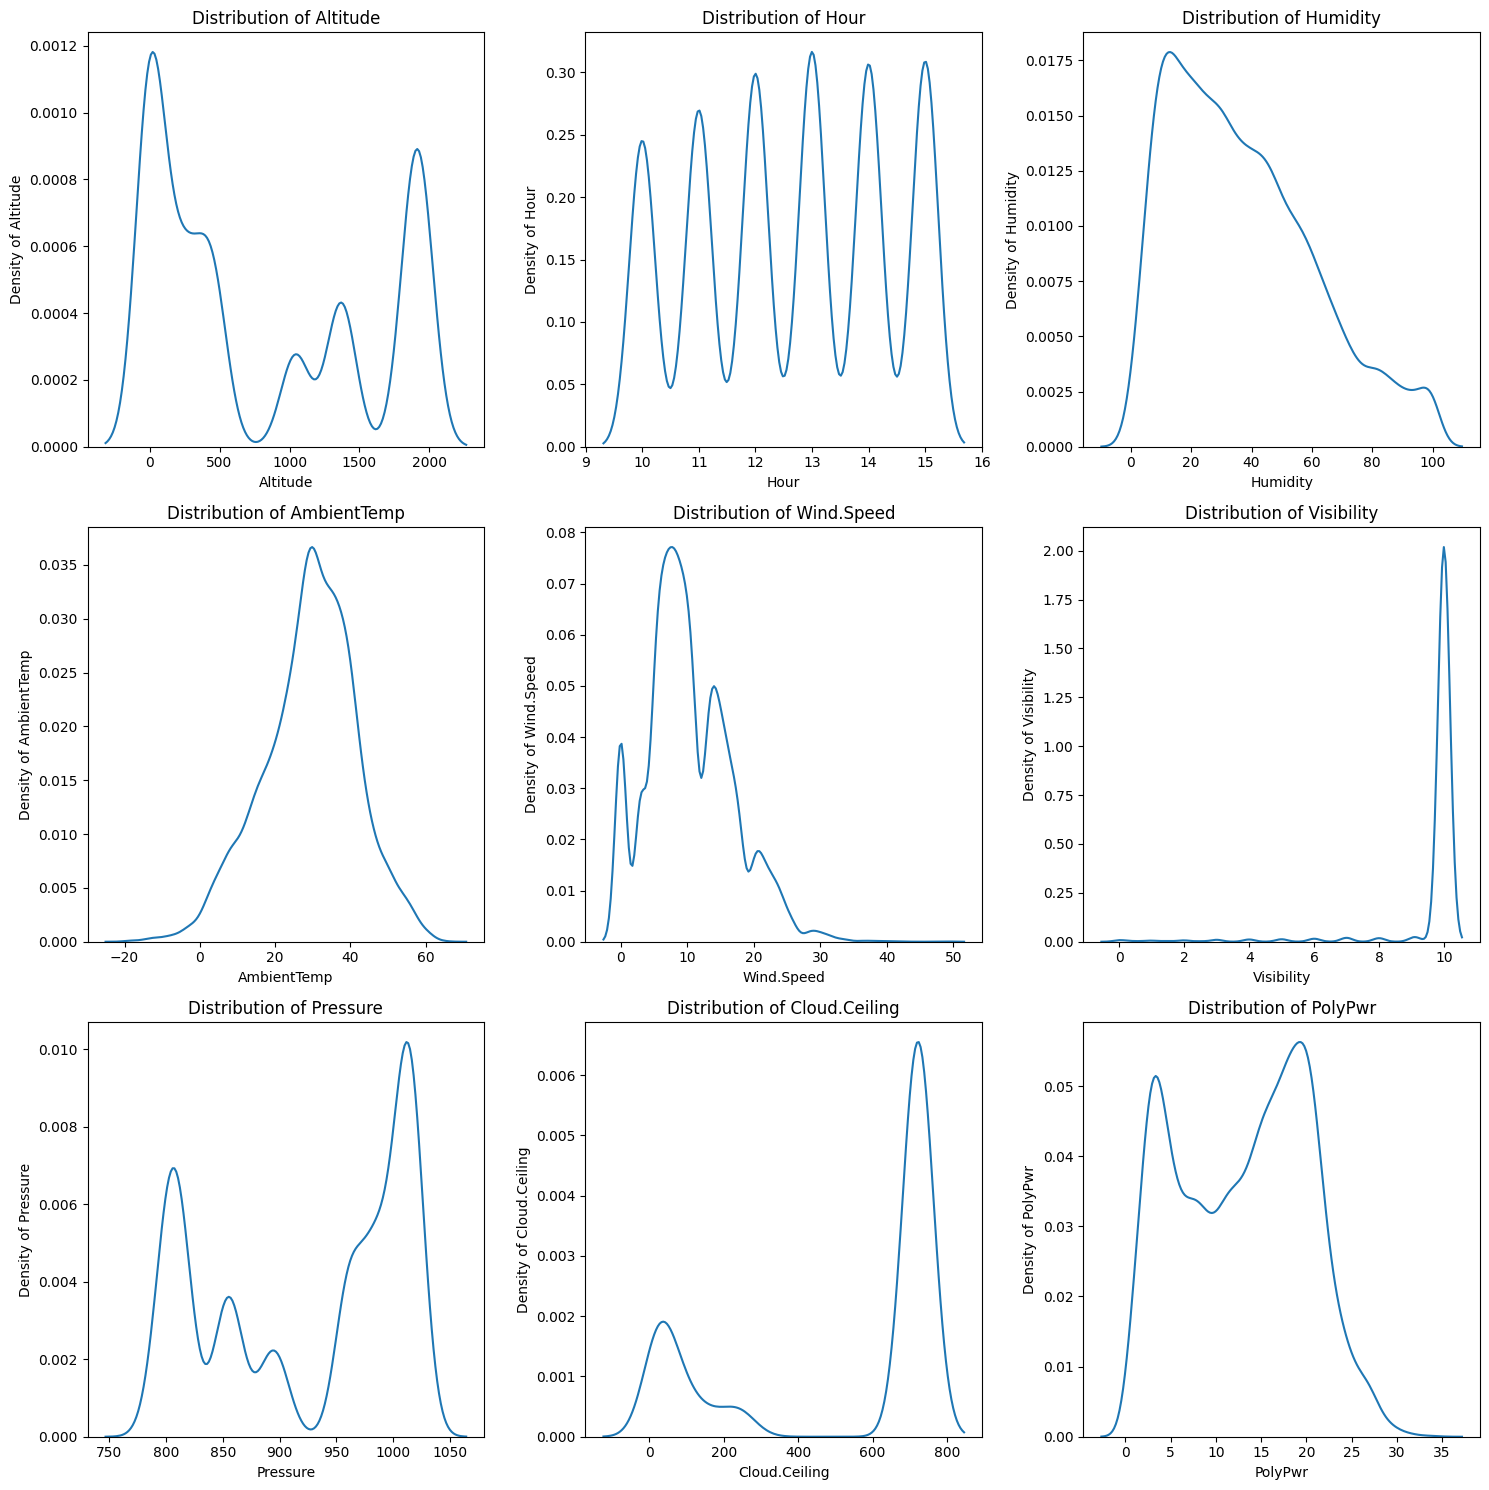

In [36]:
# Focusing only on kde

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.kdeplot(data=df, ax=axes[i], x=nums[i])
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

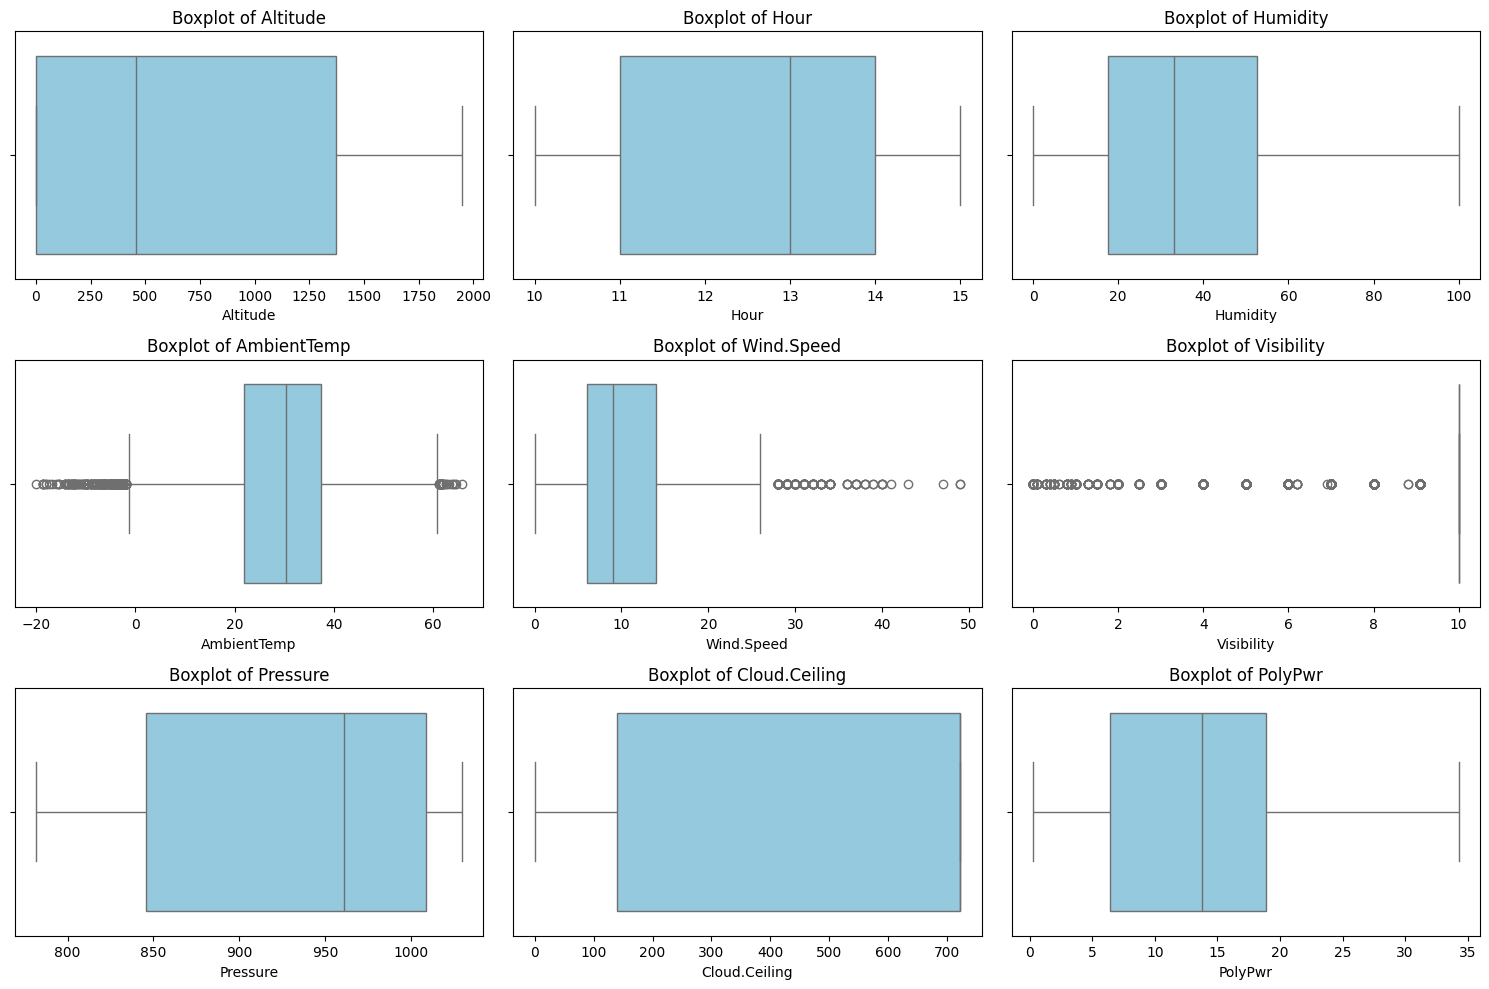

In [37]:
# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(data=df, ax=axes[i], x=nums[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

There are not many features with outliers, only AmbientTemp, Wind.Speed, and Visibility

## Categorical Columns

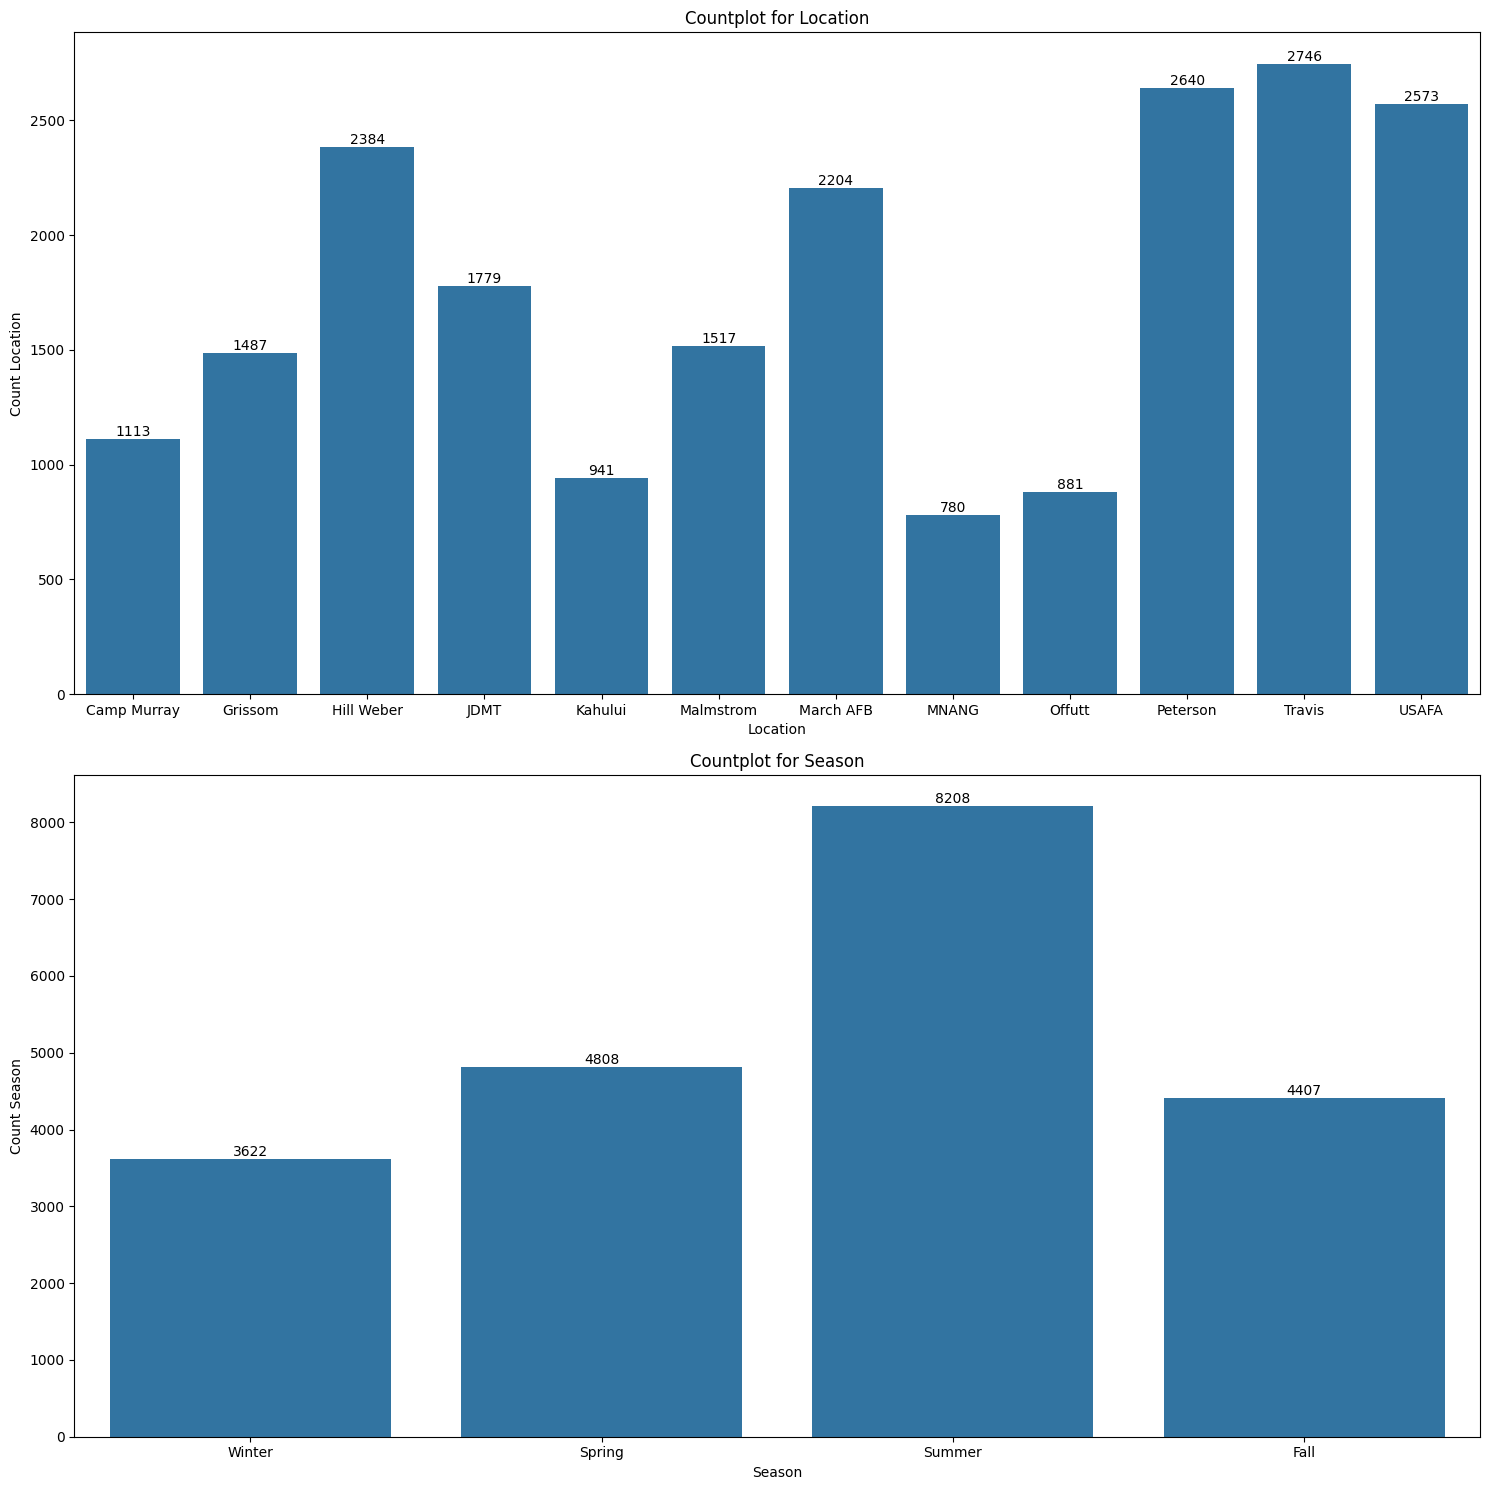

In [38]:
#Countplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

for i in range(len(cats)):
    ax = sns.countplot(data=df, ax=axes[i], x=cats[i])
    axes[i].set_title(f'Countplot for {cats[i]}')
    axes[i].set_ylabel(f'Count {cats[i]}')
    axes[i].tick_params(axis='x')
    axes[i].bar_label(axes[i].containers[0])

plt.tight_layout()
plt.show()

# Bivariate/Multivariate Analysis

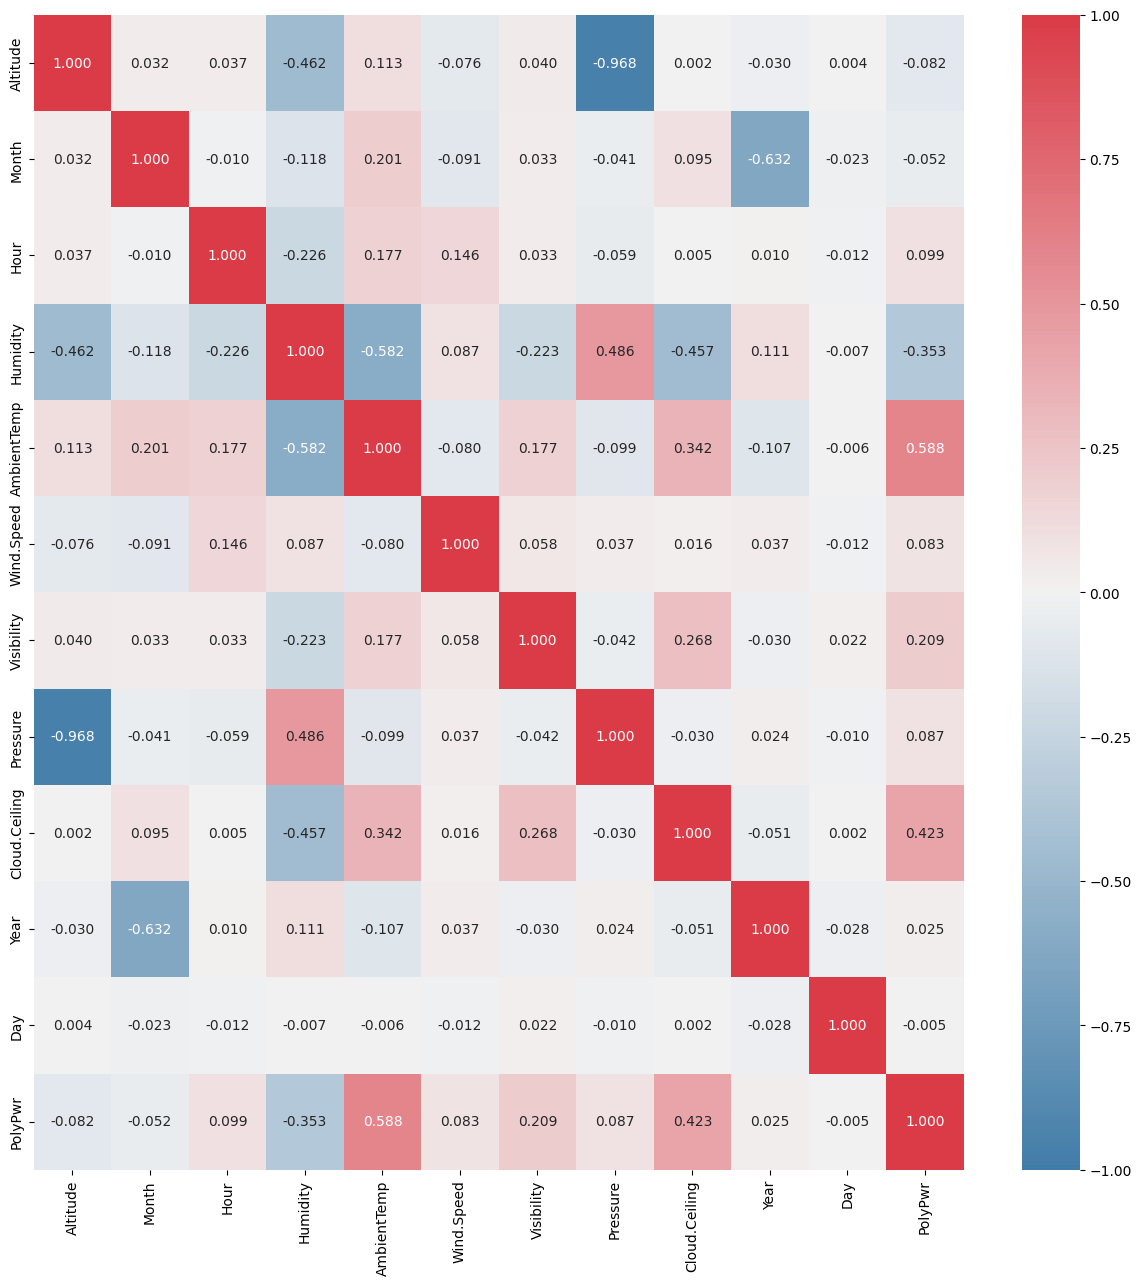

In [25]:
# Heatmap (corr spearman)
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case we use spearman correlation that is more robust/accurate in capturing non-linear (can be seen from pairplot down below) correlation of features. Some feature that have high correlation to target are Humidity, AmbientTemp, Visibility, and Cloud.Ceiling. We also likely to drop or not use Altitude feature since it has really high correlation to Pressure to avoid multicollinearity.

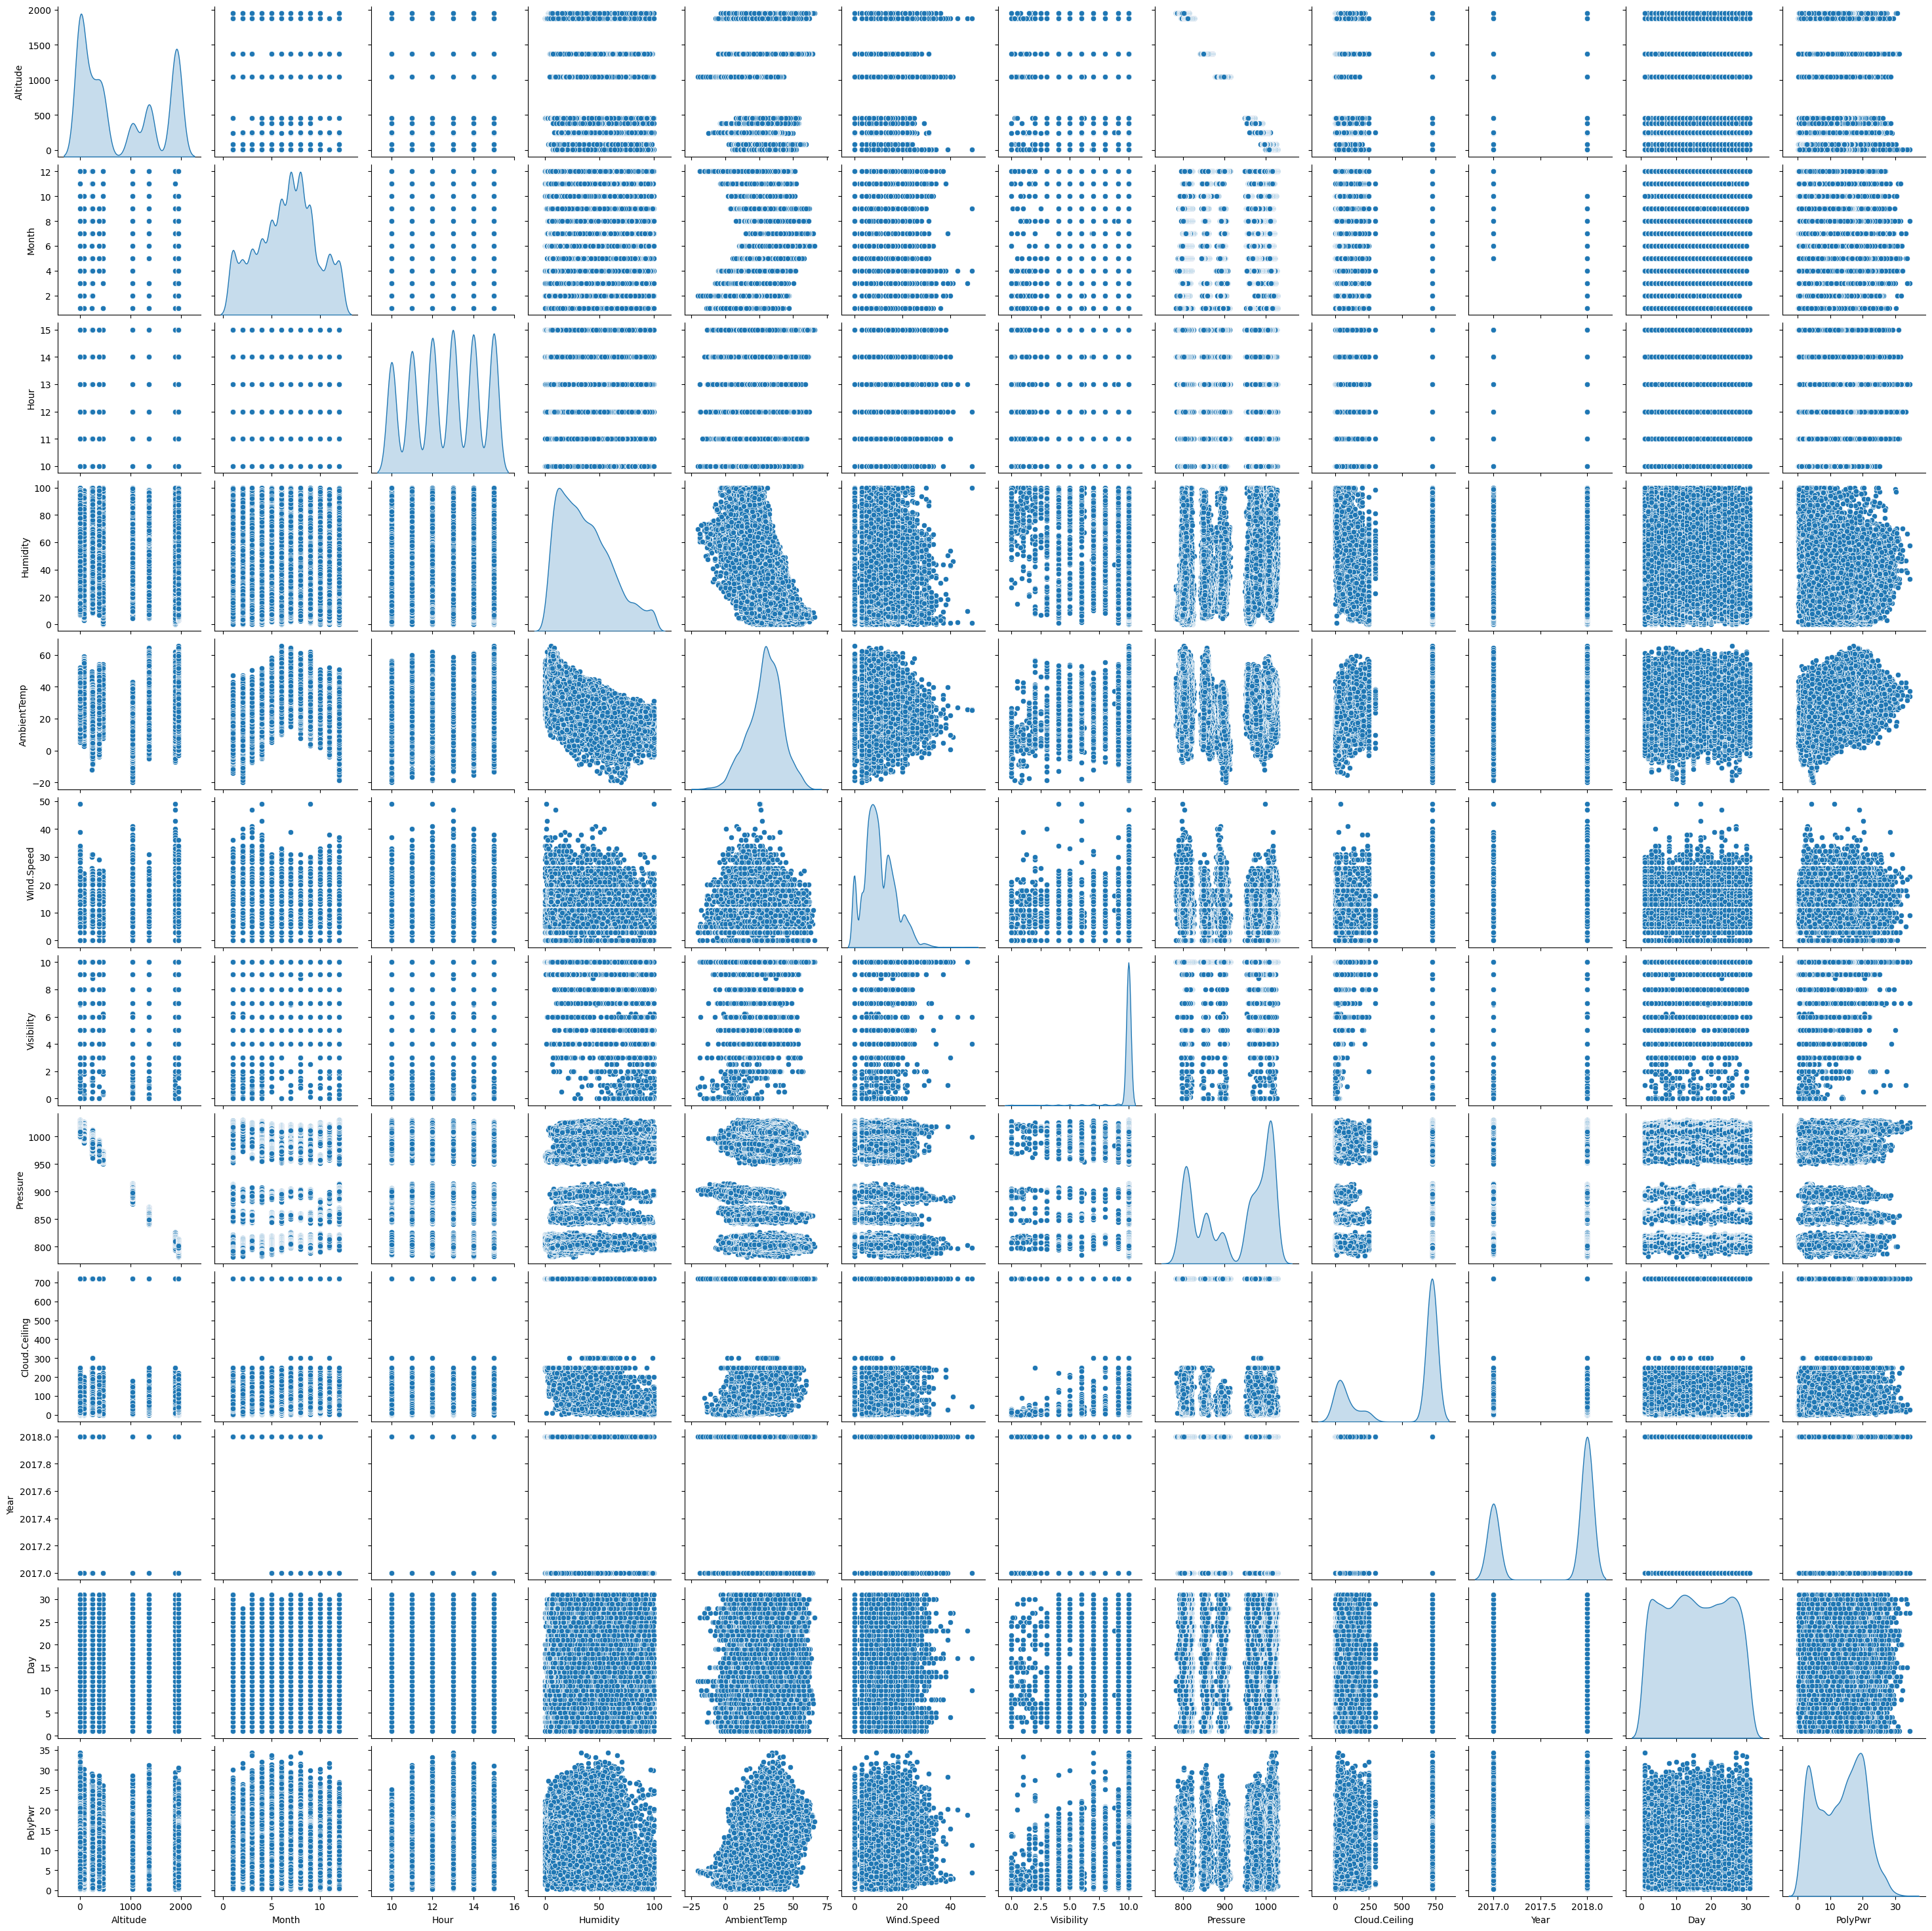

In [26]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

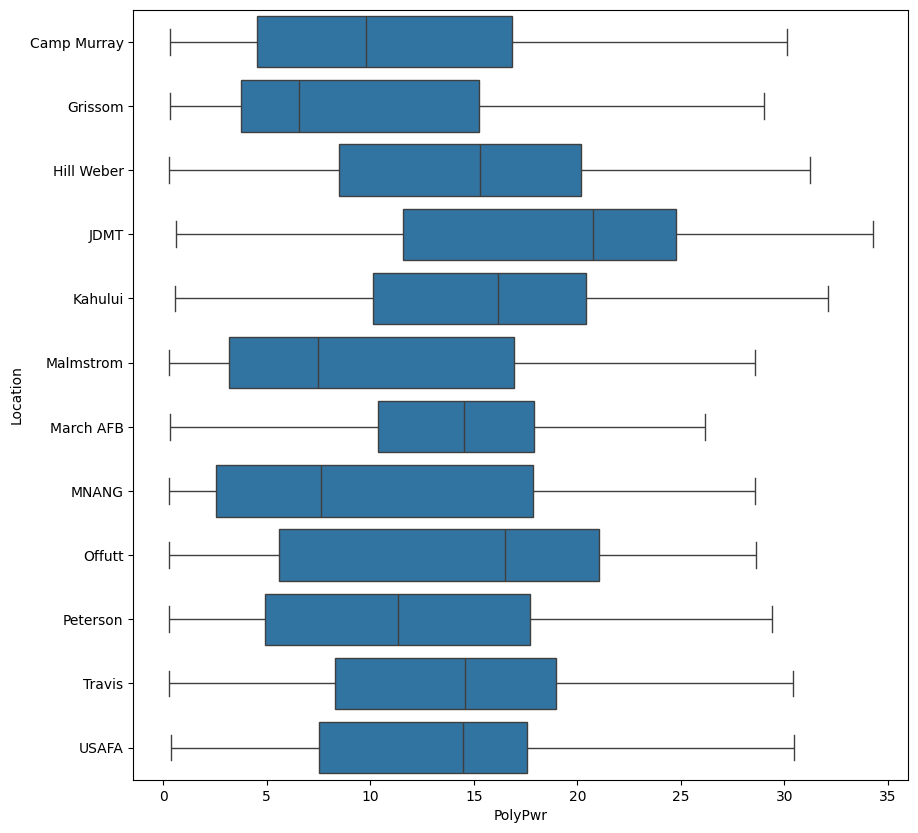

In [27]:
#Boxplot of PolyPwr by Location
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='PolyPwr', y='Location')
plt.show()

In [28]:
#Mean PolyPwr by Season
df_mean_power_season = df.groupby('Season').agg({'PolyPwr' : ['mean']})
df_mean_power_season

PolyPwr
             mean
Season           
Fall    11.167499
Spring  14.192405
Summer  15.320546
Winter   8.263660

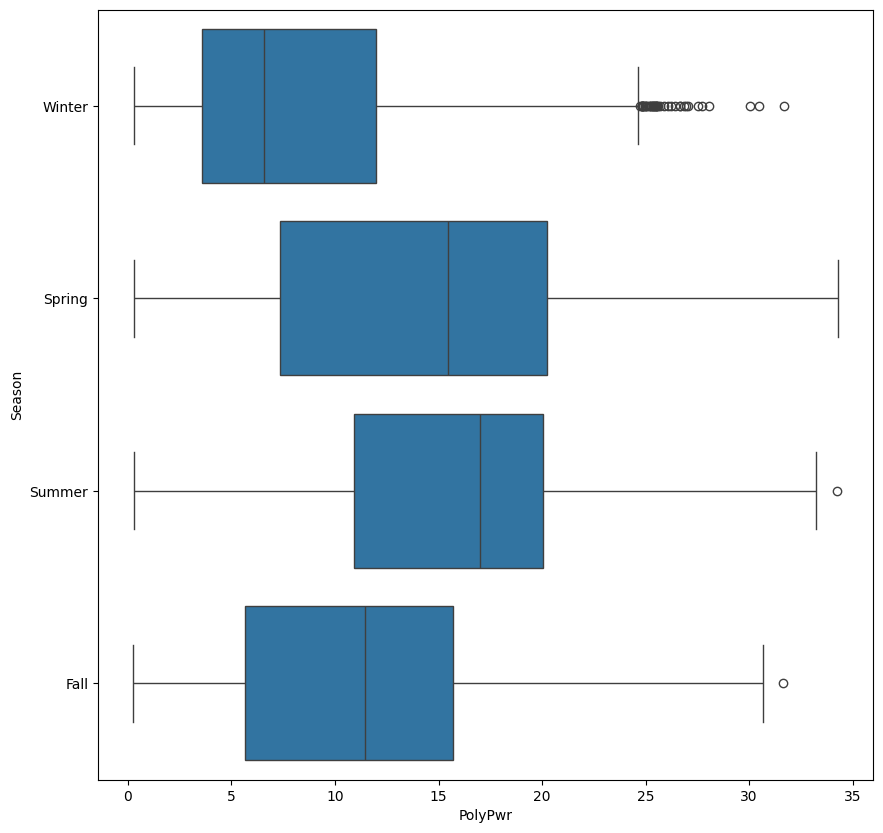

In [29]:
#Boxplot of PolyPwr by Season
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='PolyPwr', y='Season')
plt.show()

Summer as expected have the highest median PolyPwr with the lowest variability and highest overall mean of PolyPwr from all season

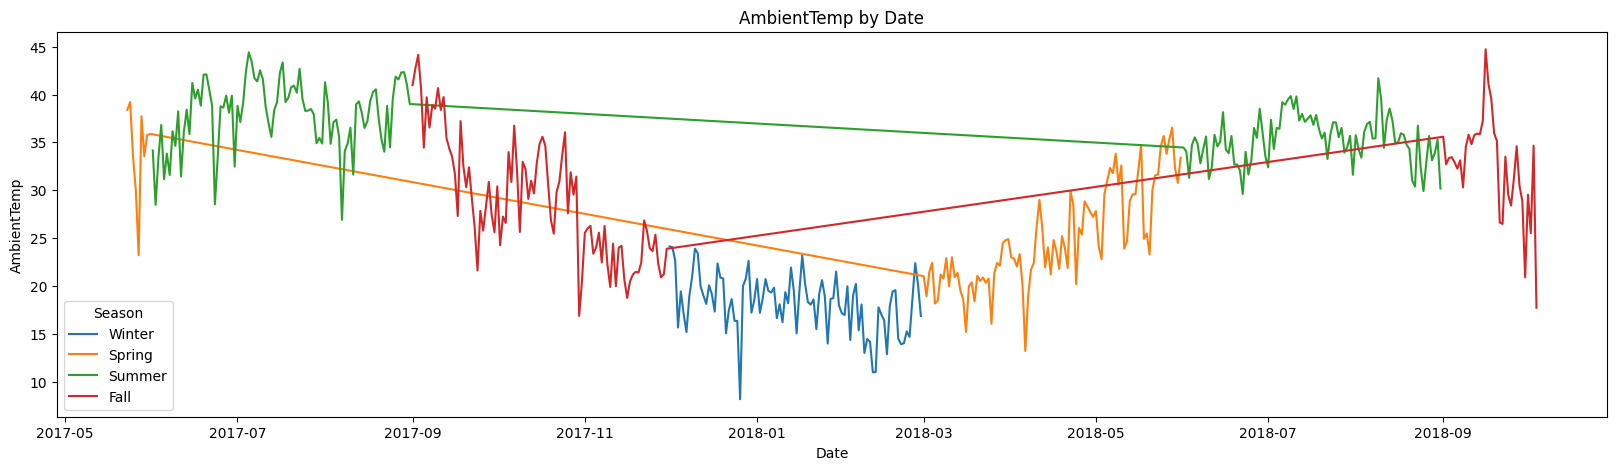

In [41]:
#AmbientTemp by Date per Season
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='Date', y='AmbientTemp', hue='Season', ci=None)
plt.ylabel('AmbientTemp')
plt.xlabel('Date')
plt.title('AmbientTemp by Date')
plt.show()

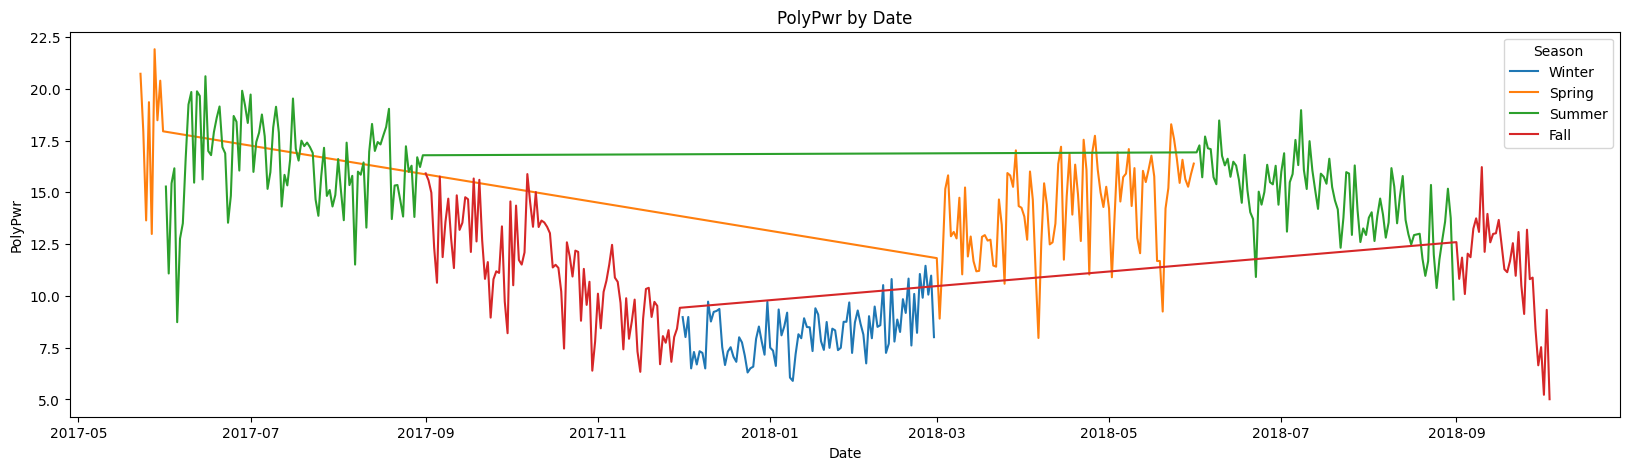

In [42]:
#Polypwr by Date per Season
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='Date', y='PolyPwr', hue='Season', ci=None)
plt.ylabel('PolyPwr')
plt.xlabel('Date')
plt.title('PolyPwr by Date')
plt.show()

The ambient temperature does have the same trend with PolyPwr generated where it went down during Winter

At first, I wanted to create a PolyPwr plot by hour because from my experience learning about solar cell irradiation, there is something called peak hours. These are periods during the day when solar radiation reaches its highest intensity, and solar cells receive sunlight with maximum intensity, resulting in optimal electricity production. However, I just realized that the 'Hour' feature in this dataset only represents the peak hours, not all hours in a day. Additionally, the distribution, as seen in the pair plot, does not allow for depicting a curve that typically has a peak shape during peak hours.

# Pre-Processing & Feature Engineering

In [43]:
# Make a copy of original dataframe for preprocessing and encoding process
df_encoding = df.copy()
df_encoding.sample(5)

Location       Date  Altitude  Month  Hour  Season  Humidity  \
14483  Peterson 2018-02-21      1879      2    10  Winter  13.43994   
12870    Offutt 2018-08-04       380      8    10  Summer  99.98779   
20040     USAFA 2018-05-08      1947      5    12  Spring  15.64331   
6369       JDMT 2018-03-01         2      3    13  Spring  27.30103   
7330    Kahului 2018-04-05         2      4    10  Spring  61.95679   

       AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Year  \
14483     16.77666           5        10.0     814.8            722  2018   
12870     22.54471           9         6.0     975.1             50  2018   
20040     33.62259           8        10.0     800.6            722  2018   
6369      44.45625          13        10.0    1016.9            722  2018   
7330      32.88490          24        10.0    1013.1            722  2018   

       Day   PolyPwr  
14483   21   3.87133  
12870    4   1.27676  
20040    8  19.34276  
6369     1   8.88449  
7330     5   6.31887

In [44]:
# Drop features that are irrelevant and we will not use for this modelling case
df_encoding = df_encoding.drop(columns=['Date', 'Altitude', 'Year'])

In [45]:
# One-hot encoding for Location
onehots = pd.get_dummies(df_encoding['Location'], prefix='Location')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Location after one-hot encoding
df_encoding.drop(columns='Location', inplace=True)

In [46]:
# One-hot encoding for Season
onehots = pd.get_dummies(df_encoding['Season'], prefix='Season')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Location after one-hot encoding
df_encoding.drop(columns='Season', inplace=True)

In [47]:
#Check dataframe after encoding and drop irrelevant features
df_encoding

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
0         12    11  81.71997     12.86919           5        10.0    1010.6   
1         12    13  96.64917      9.66415           0        10.0    1011.3   
2         12    13  93.61572     15.44983           5        10.0    1011.6   
3         12    12  77.21558     10.36659           5         2.0    1024.4   
4         12    14  54.80347     16.85471           3         3.0    1023.7   
...      ...   ...       ...          ...         ...         ...       ...   
21040      9    15  11.66992     43.22510          14        10.0     802.3   
21041      9    13  18.22510     28.98247          13        10.0     799.2   
21042      9    14  15.52124     33.49167          10        10.0     798.4   
21043      9    15   6.63452     51.62163          10        10.0     797.8   
21044     10    14  22.58301     32.83958          15        10.0     801.2   

       Cloud.Ceiling  Day   PolyPwr  Location_Camp Murray  Location_Grissom  \
0                722    3   2.42769                     1                 0   
1                 23    3   2.46273                     1                 0   
2                 32    3   4.46836                     1                 0   
3                  6    4   1.65364                     1                 0   
4                  9    4   6.57939                     1                 0   
...              ...  ...       ...                   ...               ...   
21040            722   28   9.79611                     0                 0   
21041            722   29  10.88992                     0                 0   
21042            722   29   8.24479                     0                 0   
21043            722   29  12.47328                     0                 0   
21044            110    1   6.39732                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
0                        0              0                 0               0   
1                        0              0                 0               0   
2                        0              0                 0               0   
3                        0              0                 0               0   
4                        0              0                 0               0   
...                    ...            ...               ...             ...   
21040                    0              0                 0               0   
21041                    0              0                 0               0   
21042                    0              0                 0               0   
21043                    0              0                 0               0   
21044                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
0                       0                   0                0   
1                       0                   0                0   
2                       0                   0                0   
3                       0                   0                0   
4                       0                   0                0   
...                   ...                 ...              ...   
21040                   0                   0                0   
21041                   0                   0                0   
21042                   0                   0                0   
21043                   0                   0                0   
21044                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
0                      0                0               0            0   
1                      0                0               0            0   
2                      0                0               0            0   
3                      0                0               0            0 

In [48]:
# Re-arrange the columns (PolyPwr in last)
df_1 = df_encoding.drop(columns='PolyPwr')
df_2 = df_encoding['PolyPwr']
df_encoding = pd.concat([df_1, df_2], axis='columns')

# Feature Selection

At first we will just use all the features that we got after pre-processing, this part is just additional check to compare the result of df.corr() with SelectKbest to see what will best features for prediction later

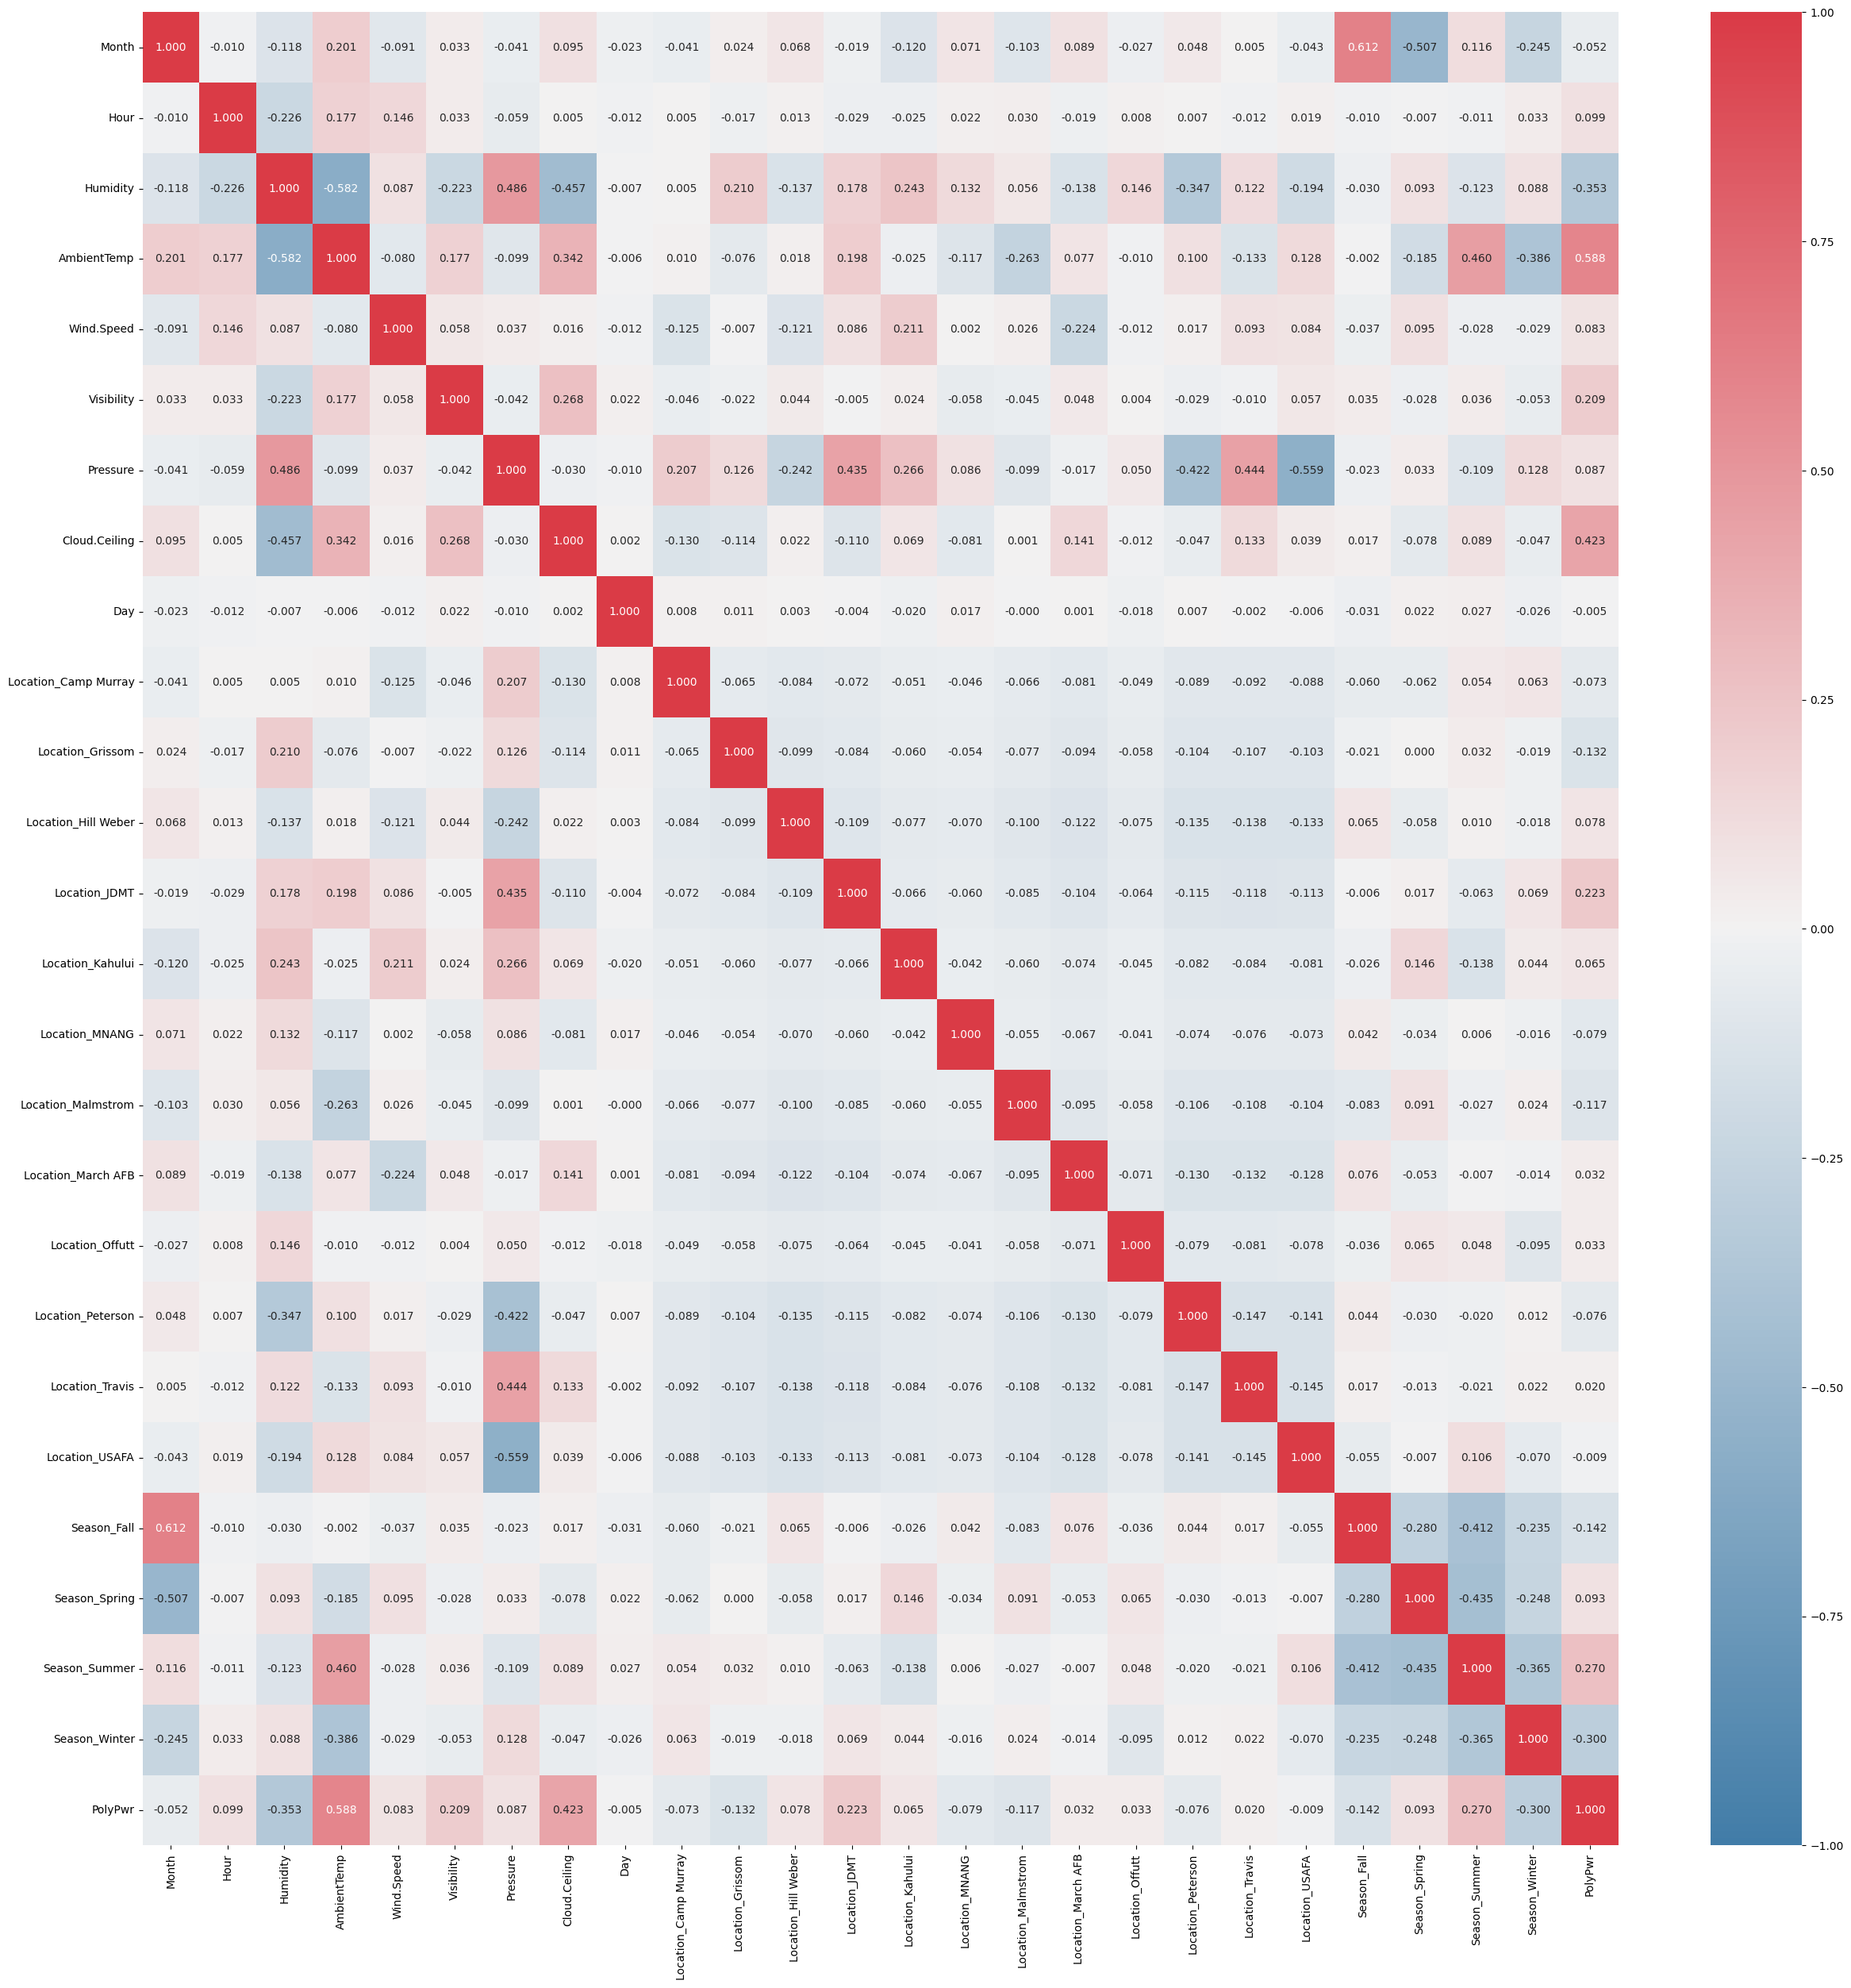

In [38]:
# Heatmap (corr spearman)
plt.figure(figsize=(30,30))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df_encoding.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [49]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_encoding.copy()
df_feature_target_relation.head()

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
0     12    11  81.71997     12.86919           5        10.0    1010.6   
1     12    13  96.64917      9.66415           0        10.0    1011.3   
2     12    13  93.61572     15.44983           5        10.0    1011.6   
3     12    12  77.21558     10.36659           5         2.0    1024.4   
4     12    14  54.80347     16.85471           3         3.0    1023.7   

   Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
0            722    3                     1                 0   
1             23    3                     1                 0   
2             32    3                     1                 0   
3              6    4                     1                 0   
4              9    4                     1                 0   

   Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
0                    0              0                 0               0   
1                    0              0                 0               0   
2                    0              0                 0               0   
3                    0              0                 0               0   
4                    0              0                 0               0   

   Location_Malmstrom  Location_March AFB  Location_Offutt  Location_Peterson  \
0                   0                   0                0                  0   
1                   0                   0                0                  0   
2                   0                   0                0                  0   
3                   0                   0                0                  0   
4                   0                   0                0                  0   

   Location_Travis  Location_USAFA  Season_Fall  Season_Spring  Season_Summer  \
0                0               0            0              0              0   
1                0               0            0              0              0   
2                0               0            0              0              0   
3                0               0            0              0              0   
4                0               0            0              0              0   

   Season_Winter  PolyPwr  
0              1  2.42769  
1              1  2.46273  
2              1  4.46836  
3              1  1.65364  
4              1  6.57939

In [51]:
#Calculation of feature importance score to target (numerical/categorical feature - numerical target)

from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['PolyPwr'])  # Features
y_target_test = df_feature_target_relation['PolyPwr']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_regression, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
print(feature_scores_df)

                 Feature     Score
3            AmbientTemp  0.296576
6               Pressure  0.200871
0                  Month  0.192151
7          Cloud.Ceiling  0.163503
2               Humidity  0.161675
24         Season_Winter  0.091994
23         Season_Summer  0.074250
15    Location_Malmstrom  0.067818
12         Location_JDMT  0.062901
1                   Hour  0.060667
21           Season_Fall  0.038178
10      Location_Grissom  0.034690
18     Location_Peterson  0.034199
5             Visibility  0.032190
20        Location_USAFA  0.031864
11   Location_Hill Weber  0.031029
19       Location_Travis  0.027720
16    Location_March AFB  0.026526
9   Location_Camp Murray  0.024003
8                    Day  0.016640
22         Season_Spring  0.015819
4             Wind.Speed  0.014113
14        Location_MNANG  0.012886
13      Location_Kahului  0.011918
17       Location_Offutt  0.010485


As we can see that AmbientTemp still hold as the most important feature to target similar to what we got before, but interestingly the Pressure feature score is high this is different from what we got using df.corr(), we will analyze the result further in the modelling process

In [52]:
df_encoding.columns

Index(['Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Day', 'Location_Camp Murray',
       'Location_Grissom', 'Location_Hill Weber', 'Location_JDMT',
       'Location_Kahului', 'Location_MNANG', 'Location_Malmstrom',
       'Location_March AFB', 'Location_Offutt', 'Location_Peterson',
       'Location_Travis', 'Location_USAFA', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'PolyPwr'],
      dtype='object')

In [53]:
# Select only relevant features
df_model = df_encoding.copy()

selected_features = ['AmbientTemp', 'Pressure', 'Month', 'Cloud.Ceiling', 'Humidity', 'Season_Winter', 'Season_Summer', 'Season_Fall', 'Season_Spring', 'PolyPwr']

df_model = df_model[selected_features]
df_model.sample(5)

AmbientTemp  Pressure  Month  Cloud.Ceiling  Humidity  Season_Winter  \
1259       3.85582     985.2     12             22  67.55981              1   
6371      38.76625    1015.5      3            722  35.90698              0   
14378     20.63377     808.9      1            250   6.75049              1   
11631      6.40877     979.6      3             22  60.87036              0   
20099     32.93022     801.4      5            722  21.16699              0   

       Season_Summer  Season_Fall  Season_Spring   PolyPwr  
1259               0            0              0   4.36330  
6371               0            0              1   7.87716  
14378              0            0              0   2.06778  
11631              0            0              1   7.74178  
20099              0            0              1  20.99619

Feature     Score
3            AmbientTemp  0.296641
6               Pressure  0.201022
0                  Month  0.193902
7          Cloud.Ceiling  0.164230
2               Humidity  0.161456
24         Season_Winter  0.093413
23         Season_Summer  0.073100
15    Location_Malmstrom  0.068628
12         Location_JDMT  0.062617
1                   Hour  0.060982
21           Season_Fall  0.038871
18     Location_Peterson  0.034669
10      Location_Grissom  0.034302
5             Visibility  0.033428
20        Location_USAFA  0.031959
11   Location_Hill Weber  0.029751
19       Location_Travis  0.027573
9   Location_Camp Murray  0.025987
16    Location_March AFB  0.025222
22         Season_Spring  0.017514
8                    Day  0.016955
4             Wind.Speed  0.014253
14        Location_MNANG  0.014092
13      Location_Kahului  0.012088
17       Location_Offutt  0.010754

# Train-Test Split

In [54]:
# Spliting data into train-test
x = df_model.drop(columns=['PolyPwr'])
y = df_model[['PolyPwr']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Outliers

It is generally recommended to handle outliers based on the training data only. The reason for this is to simulate real-world conditions during the testing phase. Handling outliers in the test set could potentially distort the evaluation of the model's performance on unseen data.

Here's the typical process:

1. **Handling outliers in the training data:** Identify and handle outliers using methods like IQR (Interquartile Range) or Z-score on the training dataset. This helps the model learn from a cleaner dataset and improves its generalization.

2. **Applying the same transformation to the test data:** Use the same parameters (like median and standard deviation for Z-score) obtained from the training data to handle outliers in the test data. This ensures consistency and reflects the real-world scenario where the model encounters new, unseen data with potential outliers.

By following this approach, you are testing the model on data that resembles what it might encounter in the real world, including outliers. This provides a more accurate assessment of how well the model generalizes to new, unseen data.

In [55]:
#Make temporary dataframe of features and target for train set
df_train_handling_outliers = pd.concat([x_train, y_train], axis='columns')

In [67]:
columns_to_handle_outliers = ['AmbientTemp'] #could change based on what features we want to use in modelling

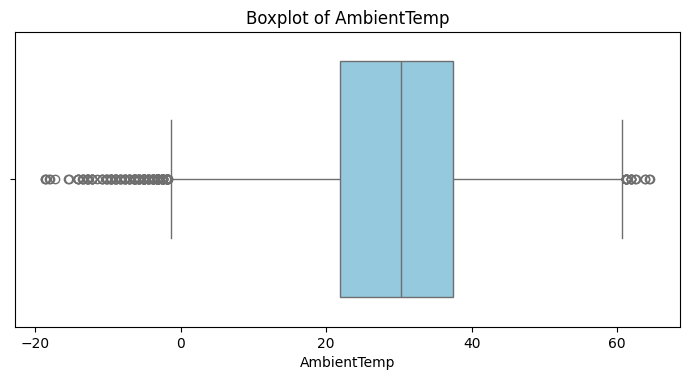

In [70]:
# Boxplot before handling outliers
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [71]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

filtered_entries = np.array([True] * len(df_train_handling_outliers))

# Select features with outliers
for col in columns_to_handle_outliers:

    Q1 = df_train_handling_outliers[col].quantile(0.25)
    Q3 = df_train_handling_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train_handling_outliers[col] >= lower_bound) & (df_train_handling_outliers[col] <= upper_bound)) & filtered_entries

df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

The number of rows before filtering out outliers : 14731
The number of rows after filtering out outliers: 14557


In [72]:
# # Remove outliers with z-score method

# from scipy import stats

# print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

# filtered_entries = np.array([True] * len(df_train_handling_outliers))

# # Select features with outliers
# for col in columns_to_handle_outliers:
#     zscore = abs(stats.zscore(df_train_handling_outliers[col])) # calculate the absolute z-score
#     filtered_entries = (zscore < 3) & filtered_entries # keep z-score values less than absolute 3
    
# df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

# print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

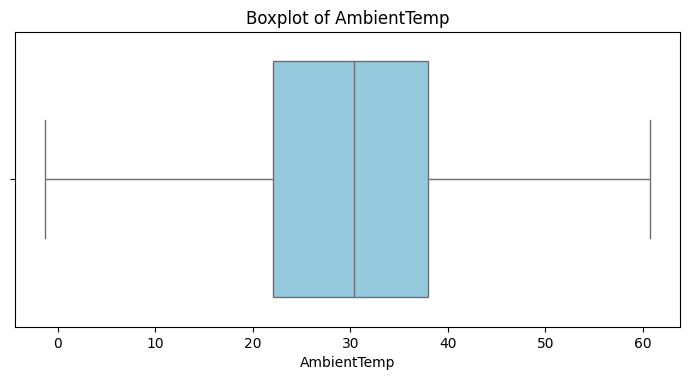

In [73]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [74]:
#Split the features and target for train set again
x_train = df_train_handling_outliers.drop(columns='PolyPwr')
y_train = df_train_handling_outliers['PolyPwr']

# Feature Scaling

Scaling will be done to train and test data

In [75]:
x_train

AmbientTemp  Pressure  Month  Cloud.Ceiling  Humidity  Season_Winter  \
13683     18.71025     814.5      9             34  52.72217              0   
6340      35.53352    1023.7      2            722  44.03687              1   
2820      31.59836     856.9      7            722  31.54907              0   
6427      33.56720    1008.8      3             37  36.07178              0   
20948     39.40575     807.8      9             32  25.37231              0   
...            ...       ...    ...            ...       ...            ...   
11284     35.43030     960.1      8            722  25.92163              0   
11964     28.32787     984.9      8             60  60.22949              0   
5390      42.57805    1019.3      8            722  42.46216              0   
860       24.49341    1010.9      8             18  60.41870              0   
15795     37.44194    1006.9      6            722  30.32837              0   

       Season_Summer  Season_Fall  Season_Spring  
13683              0            1              0  
6340               0            0              0  
2820               1            0              0  
6427               0            0              1  
20948              0            1              0  
...              ...          ...            ...  
11284              1            0              0  
11964              1            0              0  
5390               1            0              0  
860                1            0              0  
15795              1            0              0  

[14557 rows x 9 columns]

In [76]:
x_test

AmbientTemp  Pressure  Month  Cloud.Ceiling  Humidity  Season_Winter  \
20644     34.77318     805.6      7             24  35.69336              0   
20802     58.63594     804.5      8            120  10.96802              0   
6836      25.25124    1014.8     11             70  71.70410              0   
5865      41.87813    1012.8     11            722  36.25488              0   
7628      31.05705    1014.8      5            722  53.44849              0   
...            ...       ...    ...            ...       ...            ...   
2359      26.43456     984.9      8            722  84.39941              0   
673       43.85704    1011.3      7            722  17.24243              0   
12659     23.30254     972.2      6             12  99.98779              0   
13138     28.33542     816.2      6            160  22.19238              0   
15348     46.36719     820.1      7            722  22.33276              0   

       Season_Summer  Season_Fall  Season_Spring  
20644              1            0              0  
20802              1            0              0  
6836               0            1              0  
5865               0            1              0  
7628               0            0              1  
...              ...          ...            ...  
2359               1            0              0  
673                1            0              0  
12659              1            0              0  
13138              1            0              0  
15348              1            0              0  

[6314 rows x 9 columns]

In [77]:
len(x_train.columns)

9

**Additional Reminder About Feature Scalling**

When the original distribution is right-skewed, meaning that the majority of the data is concentrated on the left side with a long tail to the right, it's often more appropriate to use transformations that are less sensitive to extreme values. In this case, Min-Max scaling may be a better choice than Z-score normalization.

Here's a brief explanation:

1. **Min-Max Scaling:**
   - Scales the data to a specific range (e.g., between 0 and 1).
   - Less affected by outliers compared to Z-score normalization.
   - Suitable when the distribution is not normal and skewed.

2. **Z-score Normalization (Standardization):**
   - Centers the data around the mean and scales it by the standard deviation.
   - Can be sensitive to outliers, and right-skewed distributions may have extreme values that influence the scaling.
   - More appropriate when the data is approximately normally distributed.

Given a right-skewed distribution, Min-Max scaling is often a better choice as it allows the preservation of the skewed shape of the distribution and avoids amplifying the impact of outliers. However, the choice may also depend on the specific characteristics of your data and the requirements of your modeling task. If your data has extreme outliers, you might also consider other robust scaling methods.

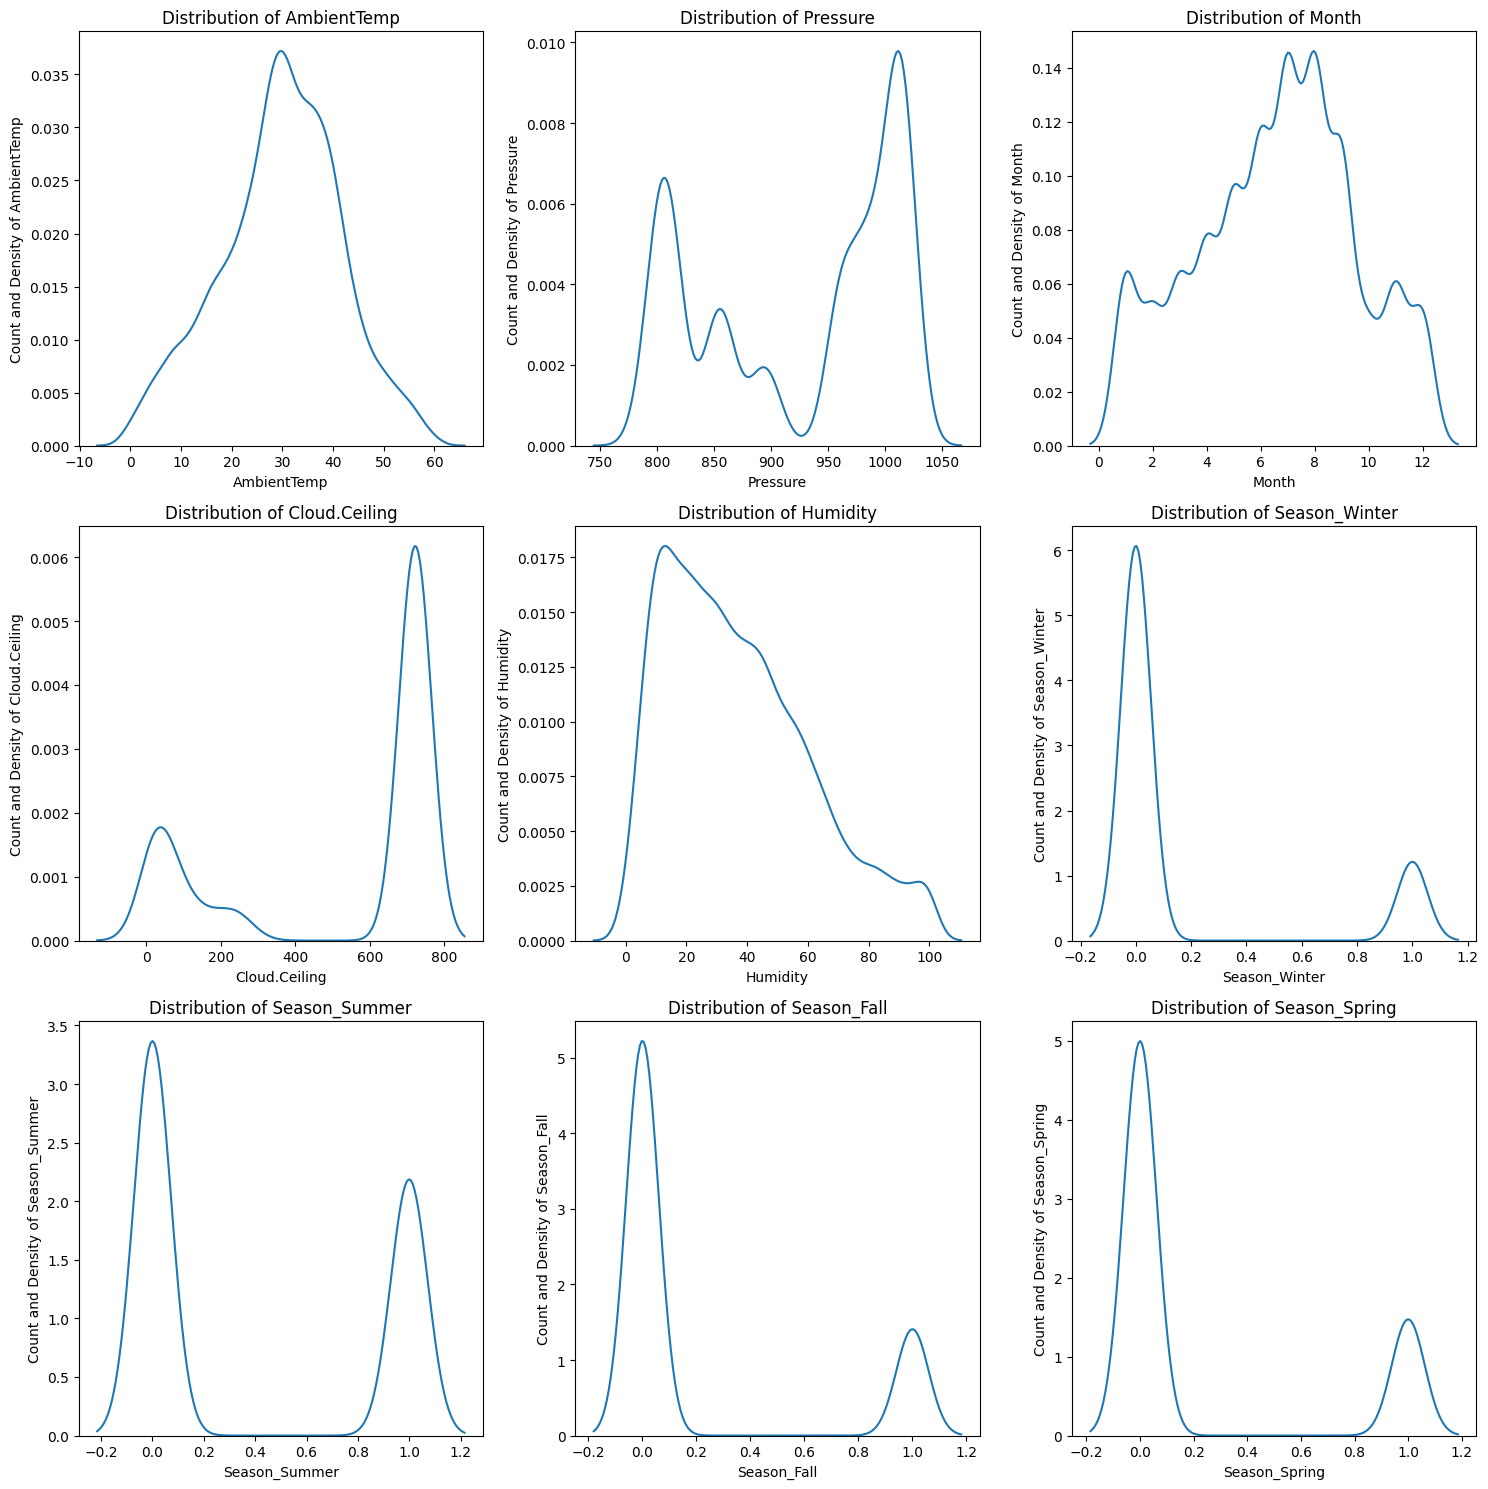

In [78]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

**Additional thing to remember about scaling multi-modal distribution**

- When dealing with features that have a multi-modal distribution, like the hour feature you mentioned with values [10, 11, 12, 13, 14, 15], scaling might not be as crucial as it is for some other types of data. Scaling is typically more important when working with algorithms that are sensitive to the scale of the input features, such as distance-based algorithms (e.g., k-nearest neighbors) or optimization algorithms (e.g., gradient descent).

- For categorical features like hours of the day, you might consider using techniques like one-hot encoding or ordinal encoding, depending on the nature of the data and the specific machine learning algorithm you plan to use. One-hot encoding represents each category as a binary column, while ordinal encoding assigns integer values based on the order of the categories.

- If you still want to scale the feature for some reason, you can use techniques like Min-Max scaling or Z-score normalization. However, keep in mind that the choice of scaling method might depend on the characteristics of your data and the requirements of your specific machine learning model. Since the hour feature has a limited range, scaling might not have a significant impact on its distribution. Always consider the context and the characteristics of your data when deciding whether or not to scale a particular feature.

In [79]:
x_train.columns

Index(['AmbientTemp', 'Pressure', 'Month', 'Cloud.Ceiling', 'Humidity',
       'Season_Winter', 'Season_Summer', 'Season_Fall', 'Season_Spring'],
      dtype='object')

We will do scaling for non-binary features that we got in encoding process, so we will do this on Humidity, AmbientTemp, Wind.Speed, Visibility, Pressure, and Cloud.Ceiling

In [80]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['Humidity', 'AmbientTemp', 'Pressure', 'Cloud.Ceiling', 'Month']
# columns_to_scale = x_train.columns.to_list() #choose all columns

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ms.fit_transform(x_train[[n]])
  x_test[n] = ms.fit_transform(x_test[[n]])
  # scaler.to_pickle(filename)

In [55]:
# #Standardization (Z-score normalization)
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# columns_to_scale = ['Humidity', 'AmbientTemp', 'Pressure', 'Cloud.Ceiling', 'Month']
# # columns_to_scale = x_train.columns.to_list() #choose all columns

# scale_features = x_train[columns_to_scale]
# for n in scale_features:
#   x_train[n] = ss.fit_transform(x_train[[n]])
#   x_test[n] = ss.fit_transform(x_test[[n]])
#   # scaler.to_pickle(filename)

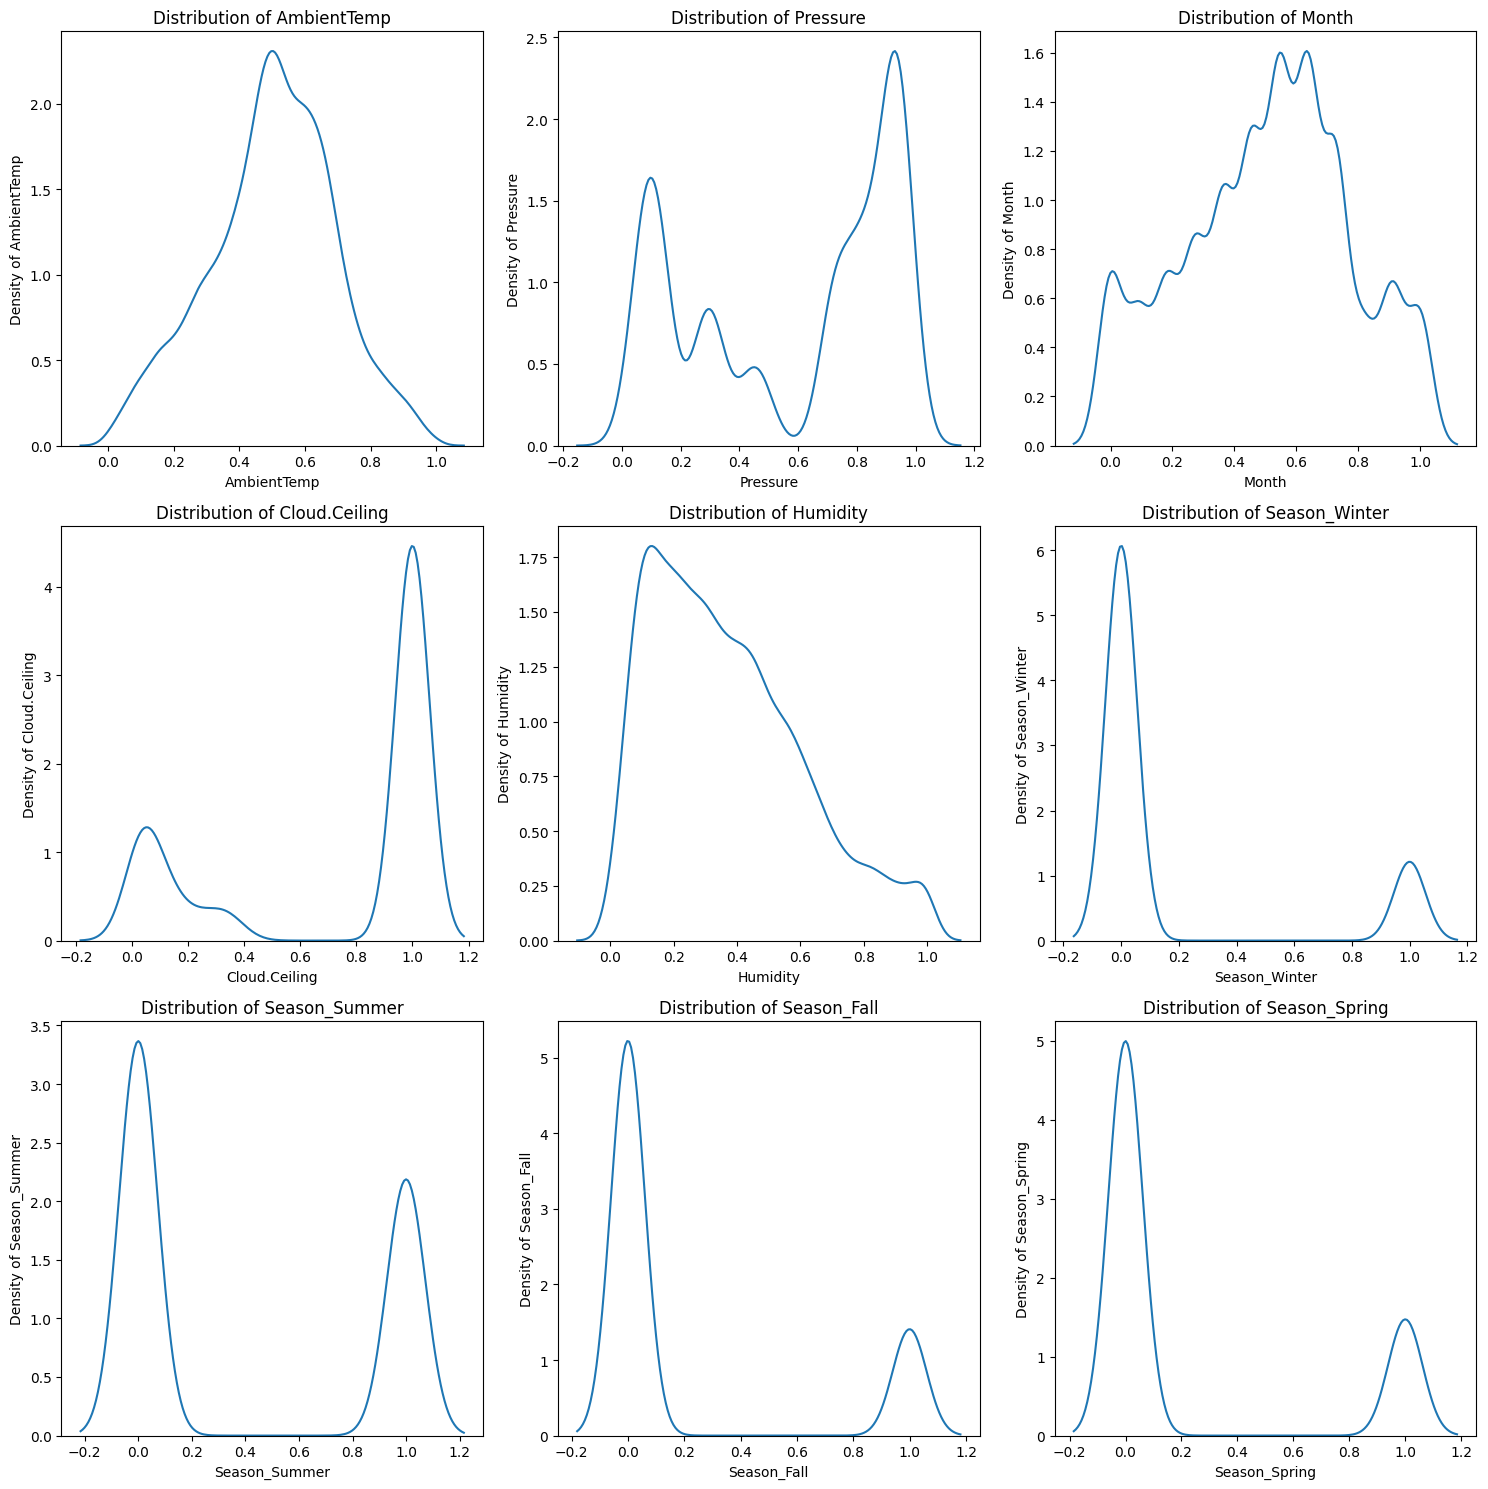

In [81]:
# Checking distribution after scaling
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

# Modelling

## Train Regression Models

In [85]:
#Check the amount of training and test data
print(f'Dimension of x_train data : {x_train.shape}')
print(f'Dimension of x_test data : {x_test.shape}')

Dimension of x_train data : (14557, 9)
Dimension of x_test data : (6314, 9)


In [61]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [63]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [64]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)

ElasticNet()

In [65]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [66]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [68]:
# Boosting : AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor()

In [69]:
# Boosting : XGBoost Regression
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [70]:
#Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  # print('MAE (train): ' + str(mean_absolute_error(y_test, y_pred_train)))
  print('MAE (test): ' + str(mean_absolute_error(y_test, y_pred)))

  # print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))
  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))

  # print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))
  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))

  # print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))
  print('R2 (test): ' + str(r2_score(y_test, y_pred)))

  #Cross Validation
  score = cross_validate(model, x_train, y_train, cv=5, scoring='r2', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('R2 Score (crossval train): '+ str(score['train_score'].mean()))
  print('R2 Score (crossval test): '+ str(score['test_score'].mean()))


In [71]:
#Printing metrics score for all models to compare

#Linear Regression
print('\nEvaluate LinearRegression')
eval_regression(lr)

#Ridge Regressor
print('\nEvaluate RidgeRegression')
eval_regression(ridge)

#Lasso Regressor
print('\nEvaluate LassoRegression')
eval_regression(lasso)

#Elastic Net Regressor
print('\nEvaluate ElasticNetRegression')
eval_regression(elasticnet)

#Decision Tree Regressor
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)

#Random Forest Regressor
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

#Support Vector Regressor
print('\nEvaluate SVR')
eval_regression(svr)

#AdaBoost Regressor
print('\nEvaluate AdaBoostRegressor')
eval_regression(ab)

#XGBoost Regressor
print('\nEvaluate XGBRegressor')
eval_regression(xg)


Evaluate LinearRegression
MAE (test): 384381546.524225
RMSE (test): 945221831.907305
MAPE (test): 86652247.62650523
R2 (test): -1.7543422302307984e+16
R2 Score (crossval train): 0.5177048868047509
R2 Score (crossval test): 0.5151032534046467

Evaluate RidgeRegression
MAE (test): 3.751564913417885
RMSE (test): 4.858690379110894
MAPE (test): 0.7462236822183446
R2 (test): 0.5364620683067971
R2 Score (crossval train): 0.5176805200875897
R2 Score (crossval test): 0.5151402353083381

Evaluate LassoRegression
MAE (test): 4.6882551430698856
RMSE (test): 5.688823349184978
MAPE (test): 0.9882354878297834
R2 (test): 0.3645348676722173
R2 Score (crossval train): 0.3380819978816506
R2 Score (crossval test): 0.3373951566072594

Evaluate ElasticNetRegression
MAE (test): 4.751806881550843
RMSE (test): 5.724012791409402
MAPE (test): 1.009868685235081
R2 (test): 0.35664893990605684
R2 Score (crossval train): 0.3314709352581079
R2 Score (crossval test): 0.33041433150166594

Evaluate DecisionTreeRegresso

### Feature Importance in Linear Models

In [72]:
#Check features
x_train.columns

Index(['Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Day', 'Location_Camp Murray',
       'Location_Grissom', 'Location_Hill Weber', 'Location_JDMT',
       'Location_Kahului', 'Location_MNANG', 'Location_Malmstrom',
       'Location_March AFB', 'Location_Offutt', 'Location_Peterson',
       'Location_Travis', 'Location_USAFA', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [73]:
# Flatten the coefficient arrays
lr_coef = pd.Series(lr.coef_.flatten())
ridge_coef = pd.Series(ridge.coef_.flatten())
lasso_coef = pd.Series(lasso.coef_.flatten())
elasticnet_coef = pd.Series(elasticnet.coef_.flatten())

# Creating a DataFrame with coefficients
linear_model_coef = pd.DataFrame({'lr_coef': lr_coef, 'ridge_coef': ridge_coef, 'lasso_coef': lasso_coef, 'elasticnet_coef': elasticnet_coef})

# Add feature names to the DataFrame
linear_model_coef['Feature'] = x_train.columns

# Set 'Feature' as the index
linear_model_coef.set_index('Feature', inplace=True)

# Display coef DataFrame
print(linear_model_coef)

lr_coef  ridge_coef  lasso_coef  elasticnet_coef
0  -2.563231e-01   -0.251551   -0.185055        -0.196694
1   4.963332e-03    0.003565    0.000000         0.000000
2  -1.508298e+00   -1.511432   -0.000000        -0.385370
3   2.126144e+00    2.121174    2.685373         2.007763
4   5.332358e-01    0.522757    0.000000         0.112325
5   9.452218e+08    0.000000    0.000000         0.000000
6   4.501288e+00    3.843469    0.000000         0.349403
7   1.395113e+00    1.396503    0.859078         0.930547
8  -1.096198e-02   -0.011065   -0.000000        -0.000096
9   1.460481e+10   -4.295763   -0.000000        -0.000000
10  1.460481e+10   -3.648334   -0.000000        -0.000000
11  1.460481e+10    4.916148    0.000000         0.000000
12  1.460481e+10    2.457353    0.000000         0.000000
13  1.460481e+10   -0.729899    0.000000         0.000000
14  1.460481e+10   -1.454952   -0.000000        -0.000000
15  1.460481e+10    0.818716   -0.000000        -0.000000
16  1.460481e+10   -1.422970   -0.000000        -0.000000
17  1.460481e+10   -0.329389    0.000000         0.000000
18  1.460481e+10    2.504159   -0.000000        -0.000000
19  1.460481e+10   -2.332751    0.000000         0.000000
20  1.460481e+10    3.517682   -0.000000        -0.000000
21 -5.915668e+11   -0.776269   -0.000000        -0.000000
22 -5.915668e+11    2.044835    0.000000         0.000000
23 -5.915668e+11    1.656694    0.000000         0.000000
24 -5.915668e+11   -2.925259   -0.000000        -0.026685

# Summary of Models Generated by Various Machine Learning Algorithms

Experiment was conducted on the models below :

1. Linear Regression (with regularization : Ridge, Lasso, and Elastic Net)
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Regression
5. Gradient Boosting Regression (AdaBoost and XGBoost)

From all of the models, the best results were obtained by:

- **Random Forest Regression**
- **XGBoost Regression**

Therefore, hyperparameter tuning can be applied to these two models to slightly improve their results (for other models that also have decent performance, experiments will be conducted if there is time and additional resources available).

## Feature Importances from Regression Models

In [74]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

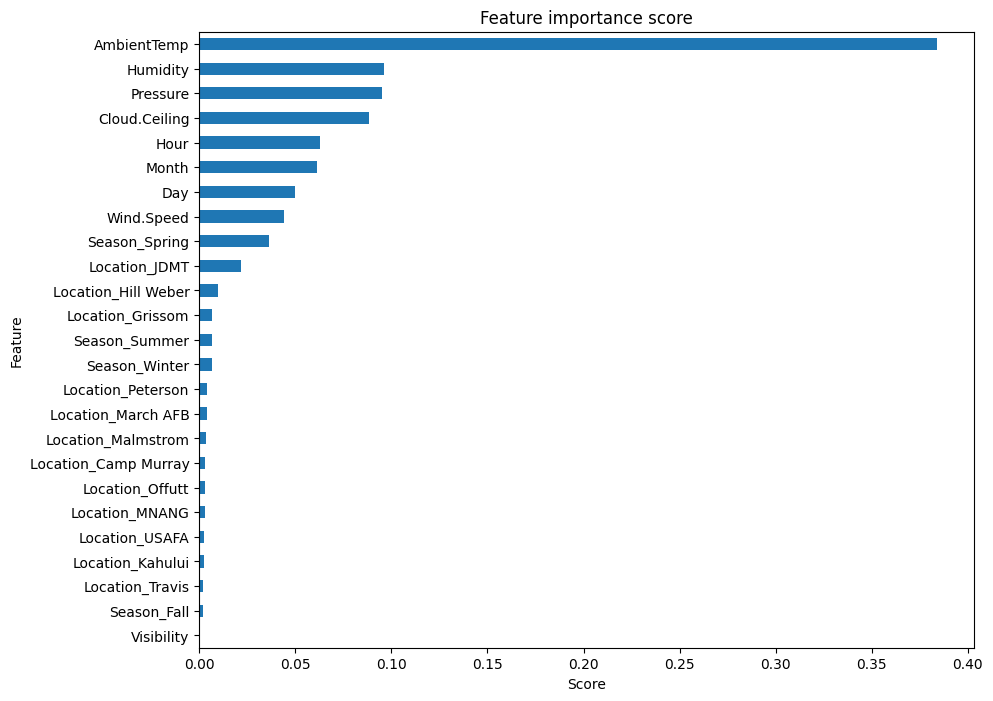

In [75]:
# Feature importance in random forest
show_feature_importance(rf)

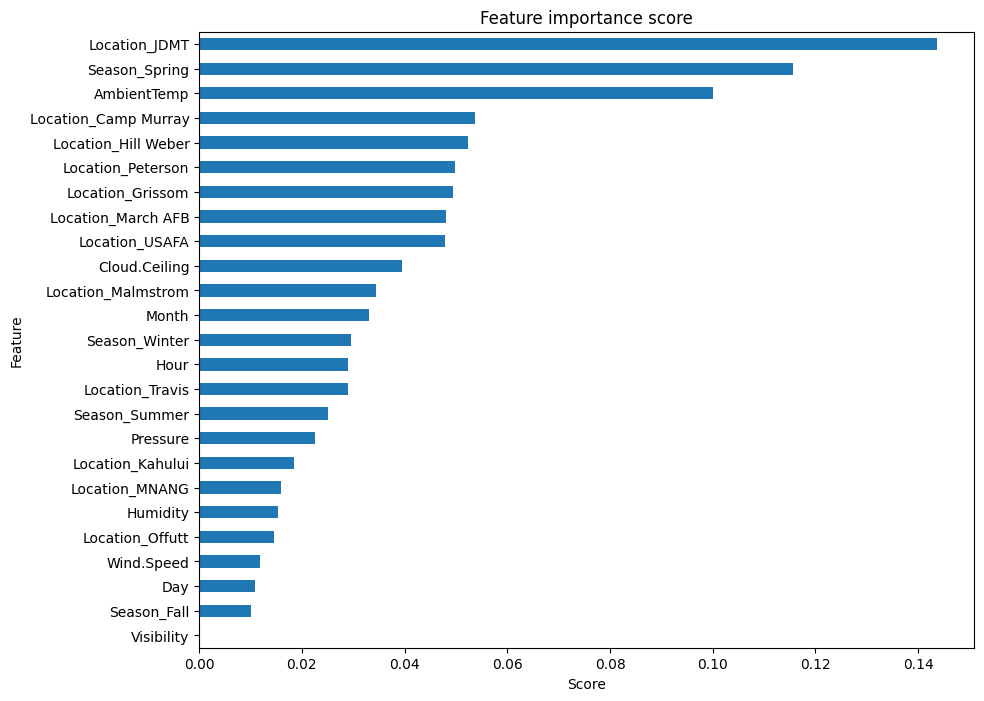

In [76]:
# Feature importance in XGB
show_feature_importance(xg)

## Hyperparameter Tuning

In [77]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest Regression

<b>Commonly tuned hyperparameters in Random Forest:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Sklearn Random Forest Documentation</a>)

- n_estimators: the number of trees to be built in the forest.
- max_samples: the maximum number of samples to be drawn from the total training set for building each tree (after the bootstrap process).

The remaining hyperparameters are the same as in Decision Trees:

- criterion: the method used to measure impurity in features (gini, entropy). This is for classification; for regression, it's different. It determines which feature becomes the root/node (squared_error, poisson).
- max_depth: the maximum depth of each tree to prevent overfitting.
- min_sample_split: the minimum number of samples required at a node to create a new leaf (to avoid having too few samples, which can lead to overfitting).
- min_sample_leaf: the minimum number of samples required in a leaf for the leaf to be formed (to avoid having too few samples, which can lead to overfitting).
- ccp_alpha: if the cost/error of a leaf/subtree is greater than ccp_alpha, that subtree will be pruned, minimizing the error/variance of the model.

In [78]:
# Hyperparameter Tuning for random forest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['squared_error', 'poisson']
max_depth = [int(x) for x in np.linspace(50, 180, 5)]
min_samples_split = [2, 5, 10, 50]
min_samples_leaf = [1, 2, 5, 8, 20, 30] 

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion, 
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf)

#Initiate tuned model
rf = RandomForestRegressor()
# rf_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='r2')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring='r2', cv=5, error_score='raise')
rf_tuned.fit(x_train, y_train)

#Tuned model evaluation
eval_regression(rf_tuned)

MAE (test): 2.8436943639319505
RMSE (test): 4.209792375265601
MAPE (test): 0.5632686247253577
R2 (test): 0.652008862150371
R2 Score (crossval train): 0.8931673590139722
R2 Score (crossval test): 0.6325874691103577


In [79]:
# Best hyperparameter in random forest
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_depth': 180, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 82, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [80]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 82,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 180,
 'criterion': 'poisson'}

In [81]:
# #Learning curve for hyperparameters

# # Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# # param_values = [int(x) for x in np.linspace(50, 180, 5)] # n_estimators
# # param_values = [int(x) for x in np.linspace(50, 180, 5)] # max_depth
# # param_values = [int(x) for x in np.linspace(2, 10, 2)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 10, 2)] # min_samples_leaf

# train_scores = []
# test_scores = []

# for i in param_values:
#     model = RandomForestRegressor(min_samples_leaf=i) # Change based on what hyperparameter that we used
#     model.fit(x_train, y_train)

#     # eval on train
#     y_pred_train_proba = model.predict_proba(x_train)
#     train_r2 = r2_score(y_train, y_pred_train_proba[:,1])
#     train_scores.append(train_r2)

#     # eval on test
#     y_pred_proba = model.predict_proba(x_test)
#     test_r2 = r2_score(y_test, y_pred_proba[:,1])
#     test_scores.append(test_r2)

#     print('Param value: ' + str(i) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

# plt.title('Learning Curve | Hyperparameter : min_sample_leaf | Random Forest') # Change based on what hyperparameter that we used
# plt.ylabel('R2 Score')
# plt.xlabel('min_sample_leaf') # Change based on what hyperparameter that we used
# plt.plot(param_values, train_scores, label='Train')
# plt.plot(param_values, test_scores, label='Test')
# plt.legend()
# plt.show()

### Hyperparameter Tuning For XGBoost Regression

<b>Commonly tuned hyperparameters in XGBoost:</b>  (<a href='https://xgboost.readthedocs.io/en/latest/parameter.html'>XGBoost Documentation</a>)

- <b>Tree architecture-related:</b>
    - max_depth: the maximum depth of the tree to prevent overfitting.
    - min_child_weight: the minimum weight (or the number of samples if the total weight equals 1) a node should have to create a new leaf (to avoid having too few, causing overfitting).
    - gamma: the minimum loss/error reduction required to make a new leaf.
    - tree_method: the method XGBoost uses to build a tree. The algorithm we are learning is tree_method = exact. Other references can be found <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>here</a>.

- <b>Boosting process subsampling:</b> Instead of using the entire training data in each iteration, we can use a sample in each iteration.
    - subsample: how much of the row samples to be used for sampling at each step. 1 for all rows.
    - colsample_bytree: how many features to be used. 1 for all features.

- <b>Control learning rate:</b>
    - eta: the step size for updating the feature weight in XGBoost, value range: 0-1. Smaller eta provides more fine-grained corrections but requires more boosting iterations.
        - In sklearn, the hyperparameter name is learning_rate.

- <b>Regularization in XGBoost:</b>
    - lambda: the regularization term on L2 norm.
    - alpha: the regularization term on L1 norm.

- <b>Learning task in XGBoost:</b>
    - objective: the objective function used, such as calculating error in regression.
    - eval_metric: evaluation metrics used on the validation data (e.g., rmse, mae, auc).
    - seed: random state.

- <b>Others:</b>
    - scale_pos_weight: if the data is imbalanced, this parameter is used to adjust the weight of each label.
    
- <b>Other parameters for model checking and debugging:</b>
    - verbose: to display detailed log information during the model training. 0: no messages; 1: display warnings only; 2: display info (deprecated examples); 3: debug: detailed training information for the model.

In [86]:
#Hyperparameter tuning for xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
max_depth = [int(x) for x in np.linspace(5, 20, 11)]
min_child_weight = [int(x) for x in np.linspace(1, 20, 11)]
gamma = [float(x) for x in np.linspace(0, 3, num = 11)]
tree_method = ['auto', 'exact', 'approx']

colsample_bytree = [float(x) for x in np.linspace(0, 1, 11)]
eta = [float(x) for x in np.linspace(0, 1, num = 100)]

# lambda = [float(x) for x in np.linspace(0, 1, 11)]
alpha = [float(x) for x in np.linspace(0, 1, 11)]

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(max_depth=max_depth, 
                       min_child_weight=min_child_weight, 
                       gamma=gamma,
                       tree_method=tree_method,
                       colsample_bytree=colsample_bytree,
                       eta=eta,
                       alpha=alpha)

#Initiate tuned model
xg = XGBRegressor()
# xg_tuned = GridSearchCV(xg, hyperparameters, cv=5, scoring='r2')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, scoring='r2', cv=5, error_score='raise')
xg_tuned.fit(x_train,y_train)

# Evaluation
eval_regression(xg_tuned)

MAE (test): 2.858064295764701
RMSE (test): 4.218963022847517
MAPE (test): 0.535744854162412
R2 (test): 0.6504910770512162
R2 Score (crossval train): 0.7981895681127092
R2 Score (crossval test): 0.6284883788517422


In [87]:
# Best hyperparameter in xgb
show_best_hyperparameter(xg_tuned)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1.2, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'approx', 'validate_parameters': None, 'verbosity': None, 'eta': 0.19191919191919193, 'alpha': 0.8}


In [88]:
# Retrieving the best hyperparameters for xgb (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = xg_tuned.best_params_
best_params

{'tree_method': 'approx',
 'min_child_weight': 6,
 'max_depth': 9,
 'gamma': 1.2,
 'eta': 0.19191919191919193,
 'colsample_bytree': 0.8,
 'alpha': 0.8}

In [89]:
# #Learning curve for hyperparameters

# # Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# # param_values = [int(x) for x in np.linspace(5, 20, 11)] #max_depth
# # param_values = [int(x) for x in np.linspace(1, 20, 11)] #min_child_weight
# # param_values = [float(x) for x in np.linspace(0, 3, num = 11)] #gamma
# # param_values = ['auto', 'exact', 'approx'] #tree_method
# # param_values = [float(x) for x in np.linspace(0, 1, 11)] #colsample_bytree
# # param_values = [float(x) for x in np.linspace(0, 1, 100)] #eta
# # param_values = [float(x) for x in np.linspace(0, 1, 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, 11)] #alpha

# train_scores = []
# test_scores = []

# for i in param_values:
#     model = XGBRegressor(alpha=i) # Change based on what hyperparameter that we used
#     model.fit(x_train, y_train)

#     # eval on train
#     y_pred_train_proba = model.predict_proba(x_train)
#     train_r2 = r2_score(y_train, y_pred_train_proba[:,1])
#     train_scores.append(train_r2)

#     # eval on test
#     y_pred_proba = model.predict_proba(x_test)
#     test_r2 = r2_score(y_test, y_pred_proba[:,1])
#     test_scores.append(test_r2)

#     print('Param value: ' + str(i) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

# plt.title('Learning Curve | Hyperparameter : alpha | XGB') # Change based on what hyperparameter that we used
# plt.ylabel('AUC')
# plt.xlabel('alpha') # Change based on what hyperparameter that we used
# plt.plot(param_values, train_scores, label='Train')
# plt.plot(param_values, test_scores, label='Test')
# plt.legend()
# plt.show()

# Comparison of Results Before and After Hyperparameter Tuning

<b>Evaluate RandomForestRegressor</b>

A. Before Hyperparameter Tuning
* MAE (test): 2.85103757187203
* RMSE (test): 4.200867868025909
* MAPE (test): 0.565500894347456
* R2 (test): 0.6534827388917007
* R2 Score (crossval train): 0.9485050194522723
* R2 Score (crossval test): 0.6299059314105596

B. After Hyperparameter Tuning
* MAE (test): 2.8436943639319505
* RMSE (test): 4.209792375265601
* MAPE (test): 0.5632686247253577
* R2 (test): 0.652008862150371
* R2 Score (crossval train): 0.8931673590139722
* R2 Score (crossval test): 0.6325874691103577

<b>Evaluate XGBRegressor</b>

A. Before Hyperparameter Tuning
* MAE (test): 2.9345514307685296
* RMSE (test): 4.26551875398415
* MAPE (test): 0.5539045880764762
* R2 (test): 0.6427349430738472
* R2 Score (crossval train): 0.8709527944245978
* R2 Score (crossval test): 0.6179286977843892

B. After Hyperparameter Tuning
* MAE (test): 2.858064295764701
* RMSE (test): 4.218963022847517
* MAPE (test): 0.535744854162412
* R2 (test): 0.6504910770512162
* R2 Score (crossval train): 0.7981895681127092
* R2 Score (crossval test): 0.6284883788517422

It does increse the R2 score even just a little but further tuning obviously still needs to be done, and we also have to experiment with other combination of features in training